# Predict the Credit_Mix category for a customer based on their financial data, and provide actionable insights to improve credit health.

In [92]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'   # Import data
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [3]:
# DF shape

df.shape

(50000, 27)

In [4]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

# Project Workflow

In order to do this project, must follow this structure....

## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [5]:
# Info about features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [6]:
# Check duplicated rows

df.duplicated().sum()

np.int64(0)

In [7]:
# Check missing values

df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

⭐ **Conclusions:**
- ID, Customer_ID, Month, Name, and SSN columns can be dropped.
- Data type of Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, and Monthly_Balance needed to be fixed.
- Credit_History_Age needed to be converted into numbers.
- Missing values needed to be handled.

### 1.1. Data Cleaning

In [8]:
# Drop unwanted features

df_cleaned = df.drop(["ID", "Customer_ID", "Month", "Name", "SSN"], axis=1)
df_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [9]:
# Change data type

cols = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]

df_cleaned[cols] = df[cols].apply(lambda c: c.astype(str).str.replace(r'[^0-9.-]', '', regex=True).pipe(pd.to_numeric, errors='coerce')) # Removing unwanted characters

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Occupation                50000 non-null  object 
 2   Annual_Income             50000 non-null  float64
 3   Monthly_Inhand_Salary     42502 non-null  float64
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  int64  
 8   Type_of_Loan              44296 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

In [10]:
# Covert Credit_History_Age into numeric value (Months)

df_cleaned['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)\s+Years?\s+and\s+(\d+)\s+Months?').astype(float).apply(lambda x: x[0]*12 + x[1] if not pd.isna(x[0]) else None, axis=1)

df_cleaned.head()



,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,2022.0,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,24,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,...,4.0,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [11]:
df_cleaned.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [12]:
# Handle missing values of numerical columns

missing_num_cols = ["Monthly_Inhand_Salary", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_History_Age", "Amount_invested_monthly", "Monthly_Balance"]

for col in missing_num_cols:
    df_cleaned[col].fillna(value=df_cleaned[col].median(), inplace=True)   # Filling missing values with the median value

df_cleaned.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [ ]:
# Check data category of Type_of_Loan

df_cleaned[["Type_of_Loan"]].head(15)

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,Credit-Builder Loan
5,Credit-Builder Loan
6,Credit-Builder Loan
7,Credit-Builder Loan
8,"Auto Loan, Auto Loan, and Not Specified"
9,"Auto Loan, Auto Loan, and Not Specified"


In [21]:
# Handle missing value of Type_of_Loan

df_cleaned["Type_of_Loan"].fillna(value="Not Specified", inplace=True)

df_cleaned.isna().sum().sum()

np.int64(0)

In [24]:
# Type_of_Loan is a multi-label categorical column, it needed to be turn into list

# Normalize text

df_cleaned["Type_of_Loan"] = df_cleaned["Type_of_Loan"].str.lower().str.replace(' and ', ' ', regex=False)
df_cleaned[["Type_of_Loan"]].head(10)

,Type_of_Loan
0,"auto loan, credit-builder loan, personal loan,..."
1,"auto loan, credit-builder loan, personal loan,..."
2,"auto loan, credit-builder loan, personal loan,..."
3,"auto loan, credit-builder loan, personal loan,..."
4,credit-builder loan
5,credit-builder loan
6,credit-builder loan
7,credit-builder loan
8,"auto loan, auto loan, not specified"
9,"auto loan, auto loan, not specified"


In [28]:
# Split and deduplicate

df_cleaned["loan_list"] = df_cleaned["Type_of_Loan"].str.split(', ').apply(lambda x: list(set(x)))

df_cleaned[["loan_list"]].head(15)

,loan_list
0,"[credit-builder loan, home equity loan, auto l..."
1,"[credit-builder loan, home equity loan, auto l..."
2,"[credit-builder loan, home equity loan, auto l..."
3,"[credit-builder loan, home equity loan, auto l..."
4,[credit-builder loan]
5,[credit-builder loan]
6,[credit-builder loan]
7,[credit-builder loan]
8,"[not specified, auto loan]"
9,"[not specified, auto loan]"


## 2. Exploratory Data Analysis (EDA)
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

In [ ]:
# Count values of Credit_Mix

credit_mix_count = df_cleaned["Credit_Mix"].value_counts()
credit_mix_count

Credit_Mix
Standard    18379
Good        12260
_            9805
Bad          9556
Name: count, dtype: int64

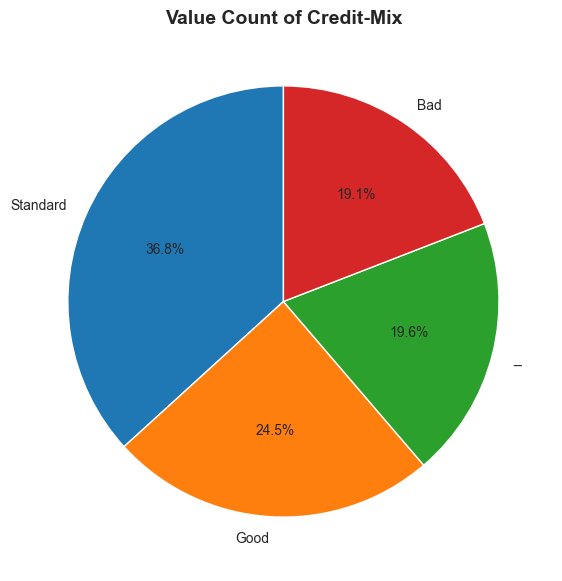

In [33]:
# Plot Credit_Mix value count

plt.figure(figsize=(7, 7))
plt.pie(credit_mix_count, labels=credit_mix_count.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Value Count of Credit-Mix', fontsize=14, fontweight='bold')
plt.show()

**Note:** There is a unusual category labeled as `_`. 19.6% of total dataset has `_` as target value. Since there is noway to fill these values with an actual value, these rows needed to be dropped.

In [37]:
# Drop rows with '_'

df_cleaned = df_cleaned[df_cleaned["Credit_Mix"] != '_']

df_cleaned.shape

(40195, 23)

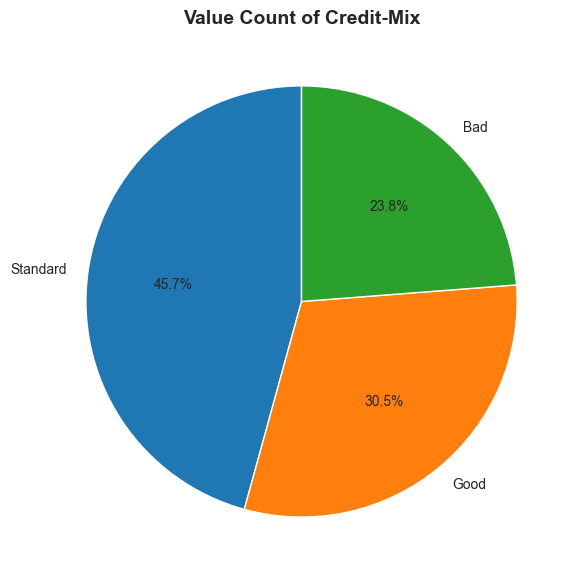

In [40]:
credit_mix_count = df_cleaned["Credit_Mix"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(credit_mix_count, labels=credit_mix_count.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Value Count of Credit-Mix', fontsize=14, fontweight='bold')
plt.show()

In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40195 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       40195 non-null  int64  
 1   Occupation                40195 non-null  object 
 2   Annual_Income             40195 non-null  float64
 3   Monthly_Inhand_Salary     40195 non-null  float64
 4   Num_Bank_Accounts         40195 non-null  int64  
 5   Num_Credit_Card           40195 non-null  int64  
 6   Interest_Rate             40195 non-null  int64  
 7   Num_of_Loan               40195 non-null  int64  
 8   Type_of_Loan              40195 non-null  object 
 9   Delay_from_due_date       40195 non-null  int64  
 10  Num_of_Delayed_Payment    40195 non-null  float64
 11  Changed_Credit_Limit      40195 non-null  float64
 12  Num_Credit_Inquiries      40195 non-null  float64
 13  Credit_Mix                40195 non-null  object 
 14  Outstanding

In [45]:
# Numerical and categorical columns

num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

cat_cols = ["Occupation", "Payment_of_Min_Amount", "Payment_Behaviour"]

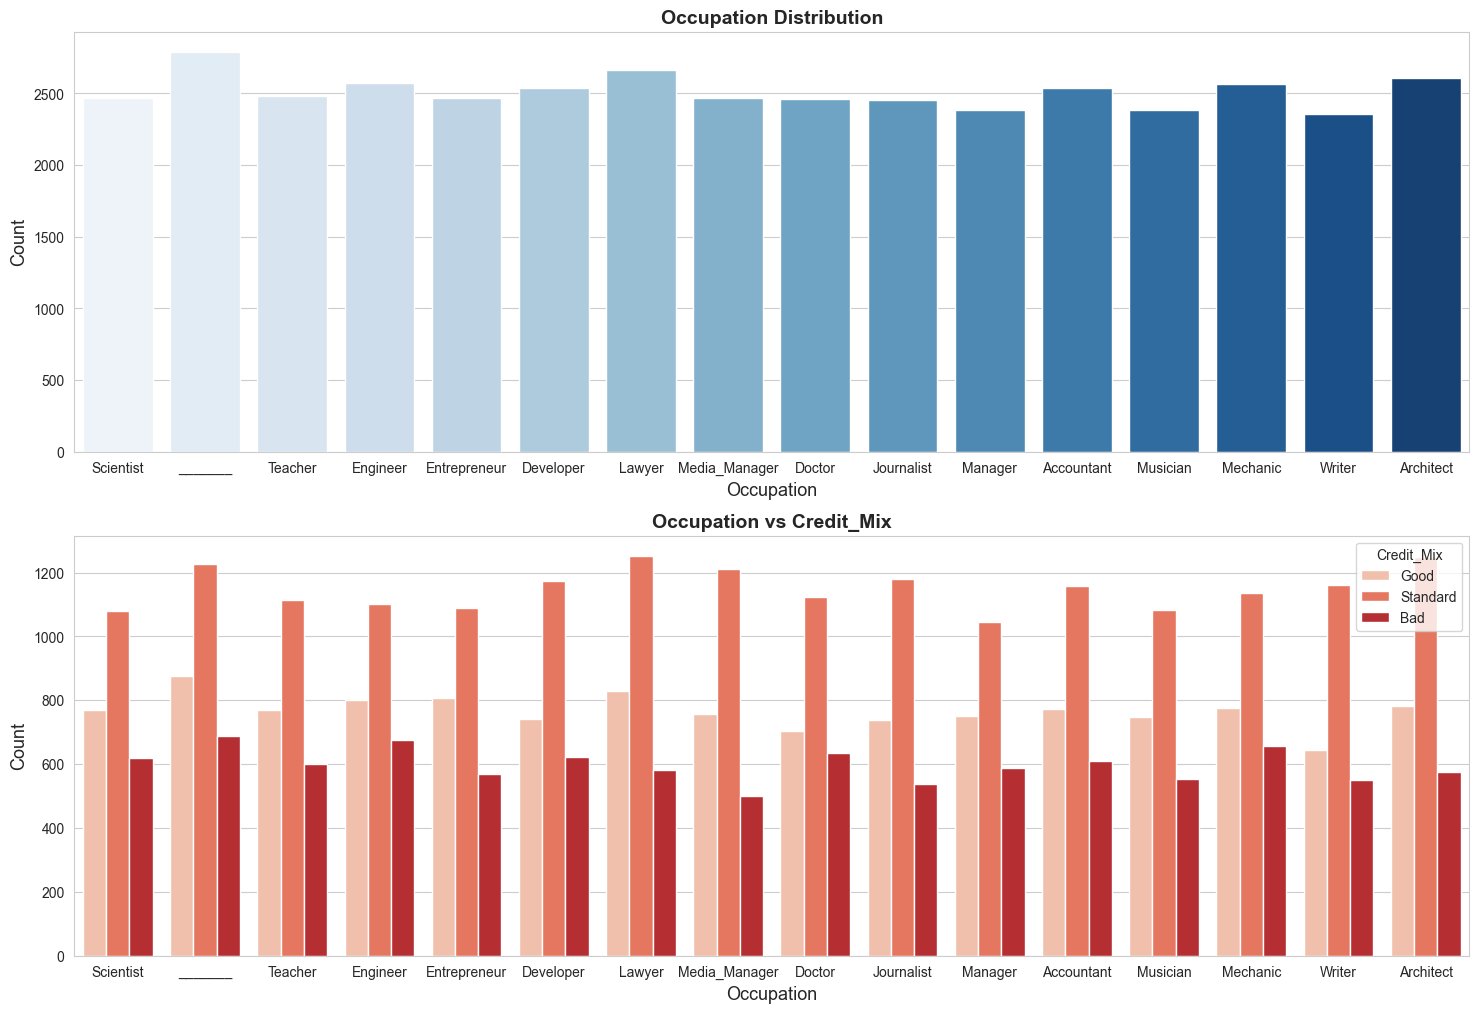

In [55]:
# Occupation

plt.figure(figsize=(18,12))
plt.subplot(211)
sns.countplot(x = df_cleaned["Occupation"], palette='Blues')
plt.title('Occupation Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=13)
plt.ylabel('Count', fontsize=13)

plt.subplot(212)
sns.countplot(x = df_cleaned["Occupation"],hue=df_cleaned["Credit_Mix"], palette='Reds')
plt.title('Occupation vs Credit_Mix', fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()


**Note:** There is a category label with `_______`. Replace it with `Unknown`.

In [74]:
df_cleaned["Occupation"] = df_cleaned["Occupation"].str.replace('_______', 'Unknown')
df_cleaned["Occupation"].value_counts()

Occupation
Unknown          2791
Lawyer           2661
Architect        2606
Engineer         2574
Mechanic         2566
Accountant       2538
Developer        2535
Teacher          2484
Media_Manager    2468
Entrepreneur     2467
Scientist        2466
Doctor           2462
Journalist       2452
Manager          2386
Musician         2384
Writer           2355
Name: count, dtype: int64

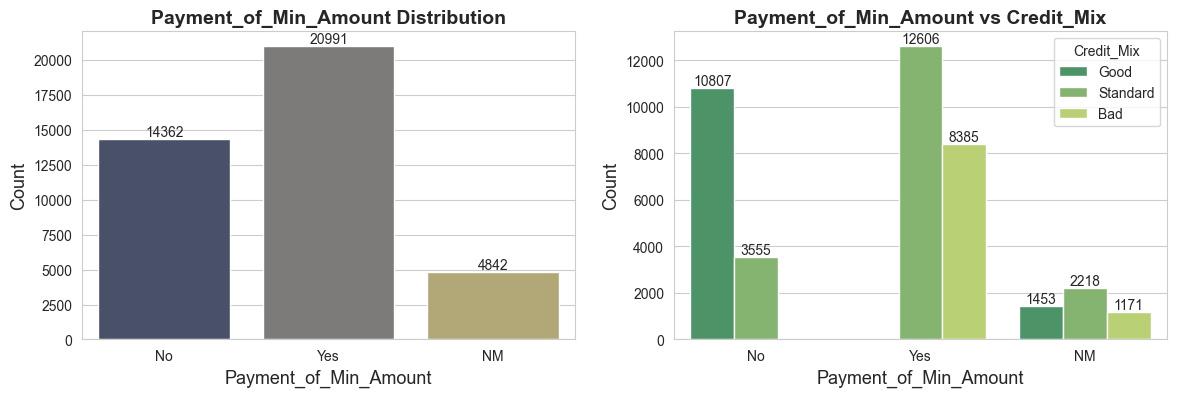

In [59]:
# Payment_of_Min_Amount

plt.figure(figsize=(14,4))
plt.subplot(121)
ax = sns.countplot(x = df_cleaned["Payment_of_Min_Amount"], palette='cividis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Payment_of_Min_Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment_of_Min_Amount', fontsize=13)
plt.ylabel('Count', fontsize=13)

plt.subplot(122)
ax = sns.countplot(x = df_cleaned["Payment_of_Min_Amount"],hue=df_cleaned["Credit_Mix"], palette='summer')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Payment_of_Min_Amount vs Credit_Mix', fontsize=14, fontweight='bold')
plt.xlabel('Payment_of_Min_Amount', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

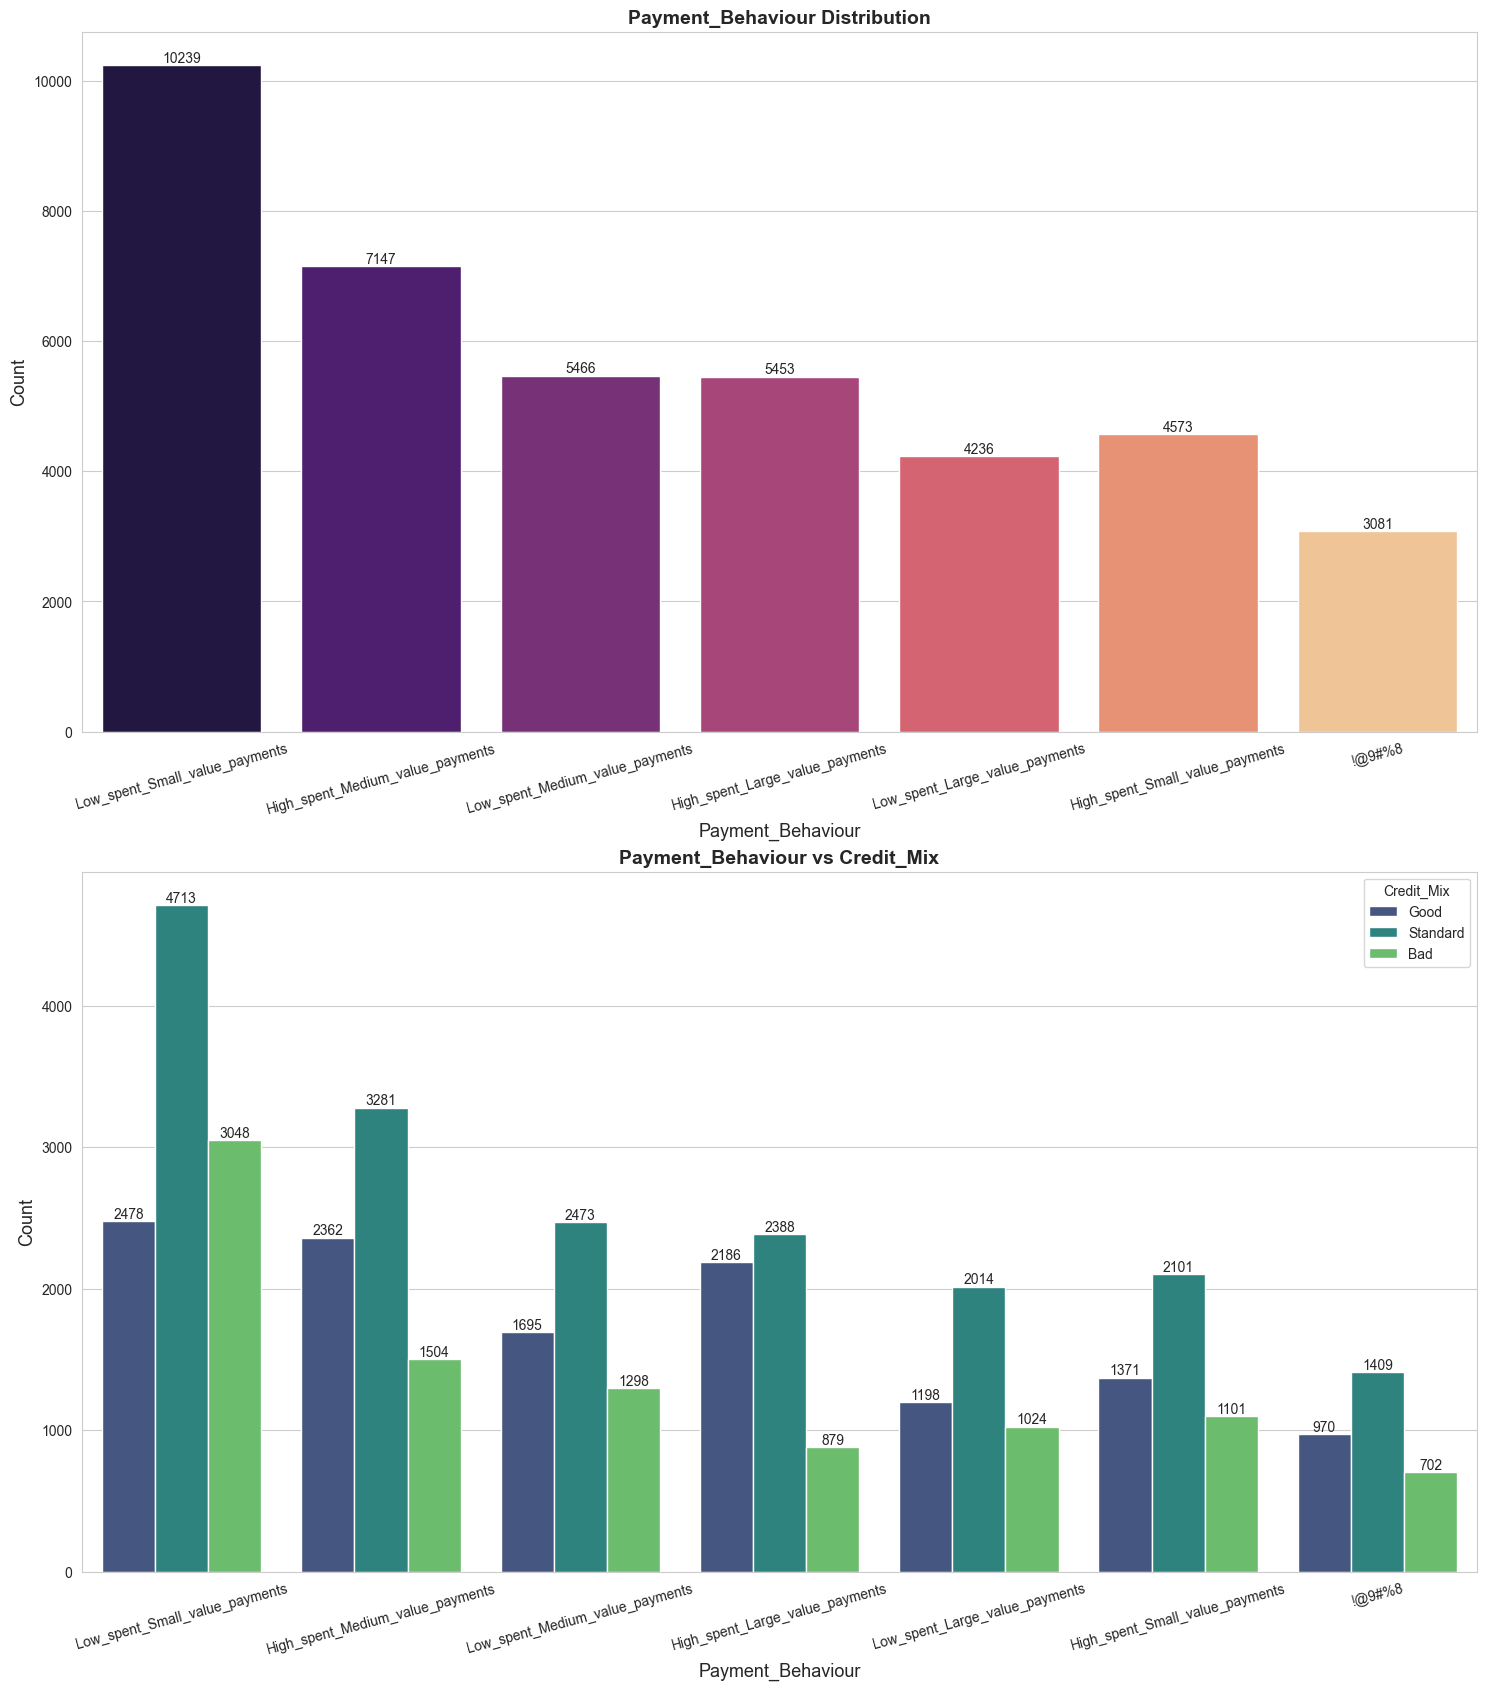

In [71]:
# Payment_Behaviour

plt.figure(figsize=(18,20))
plt.subplot(211)
ax = sns.countplot(x = df_cleaned["Payment_Behaviour"], palette='magma',)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Payment_Behaviour Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment_Behaviour', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=15)

plt.subplot(212)
ax = sns.countplot(x = df_cleaned["Payment_Behaviour"],hue=df_cleaned["Credit_Mix"], palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Payment_Behaviour vs Credit_Mix', fontsize=14, fontweight='bold')
plt.xlabel('Payment_Behaviour', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=15)
plt.show()

**Note:** There is a category label with `!@9#%8`. Replace it with `Unknown`.

In [76]:
df_cleaned["Payment_Behaviour"] = df_cleaned["Payment_Behaviour"].str.replace("!@9#%8", "Unknown")
df_cleaned["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      10239
High_spent_Medium_value_payments     7147
Low_spent_Medium_value_payments      5466
High_spent_Large_value_payments      5453
High_spent_Small_value_payments      4573
Low_spent_Large_value_payments       4236
Unknown                              3081
Name: count, dtype: int64

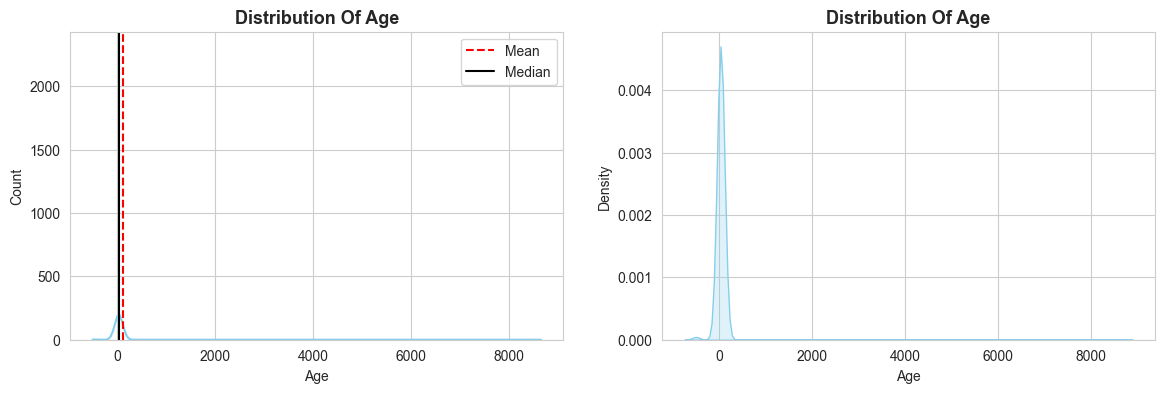

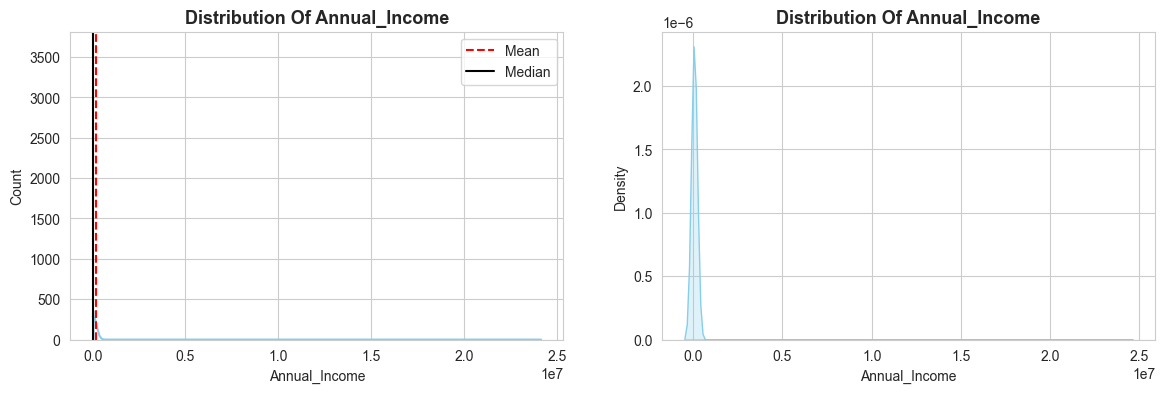

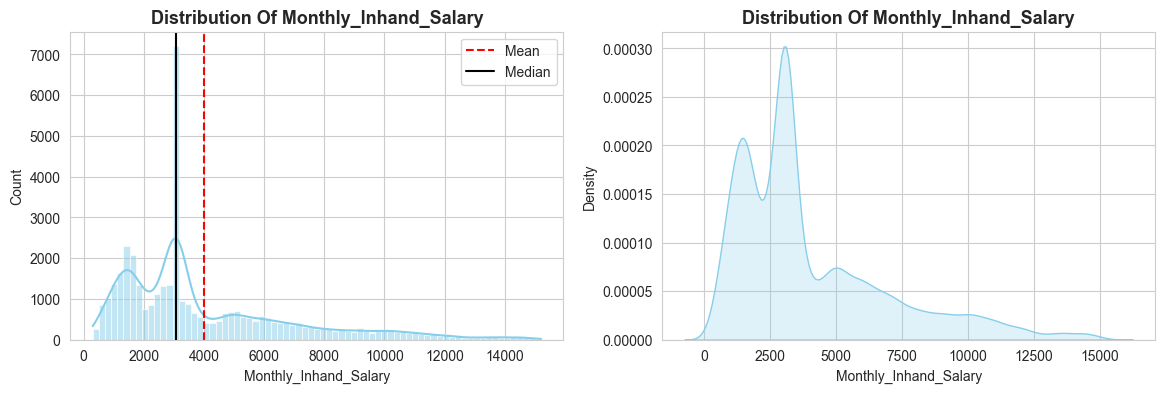

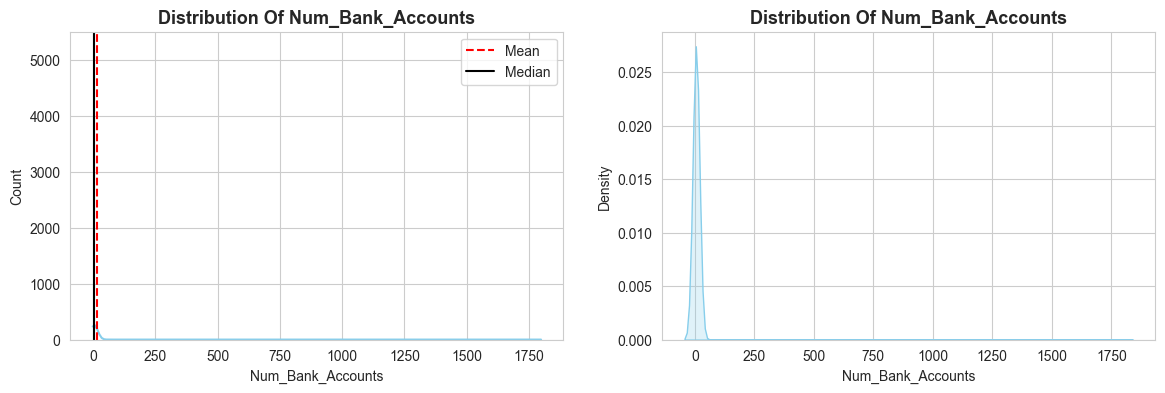

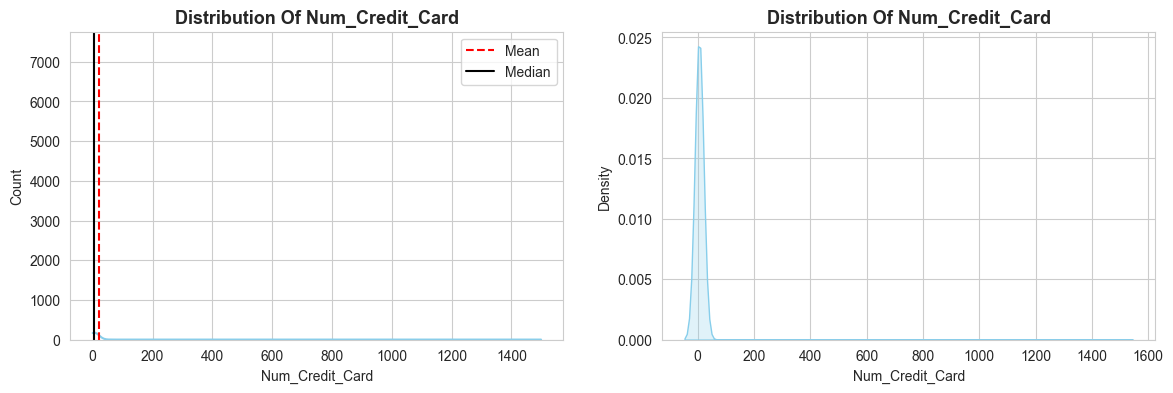

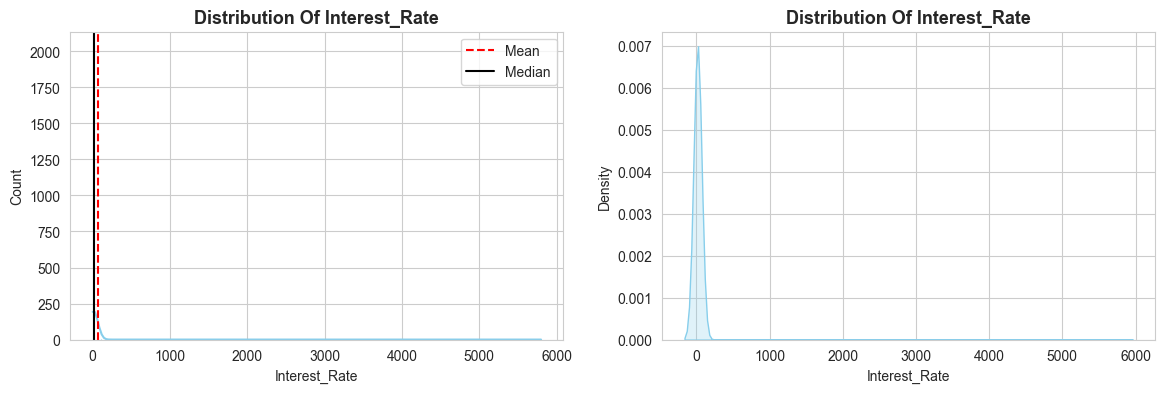

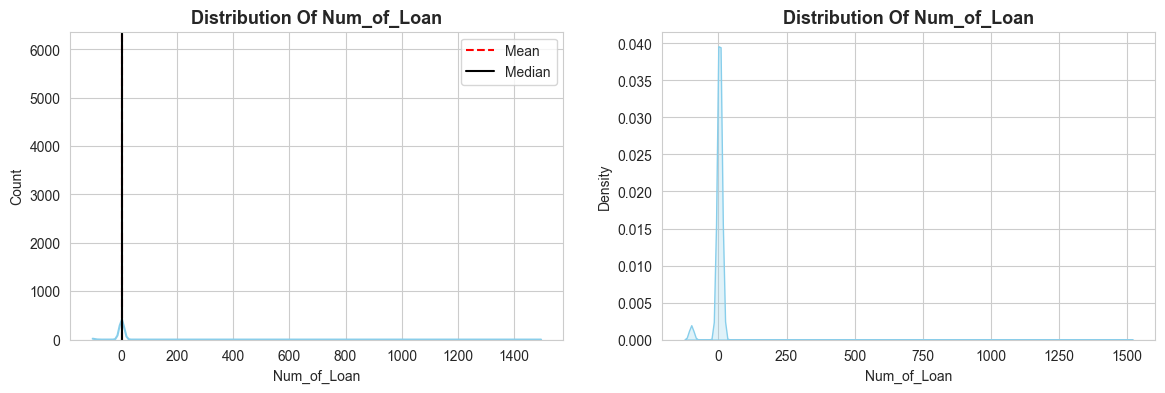

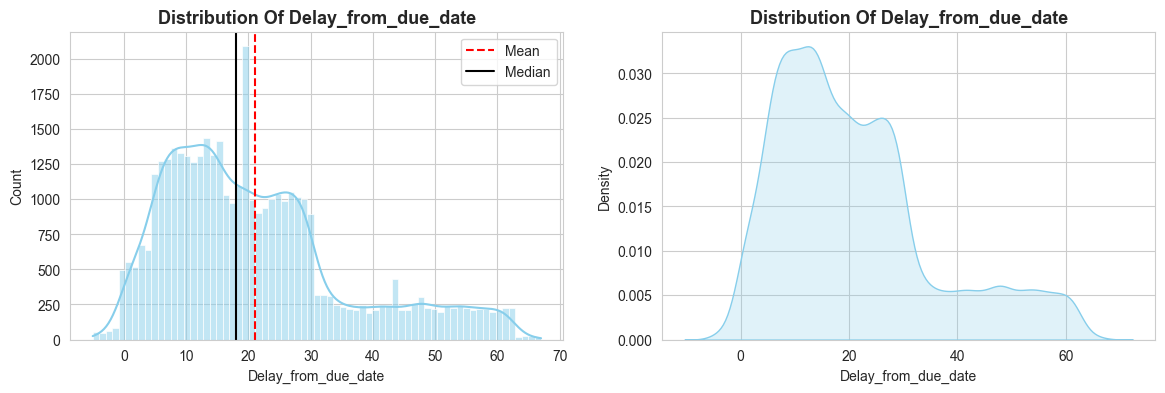

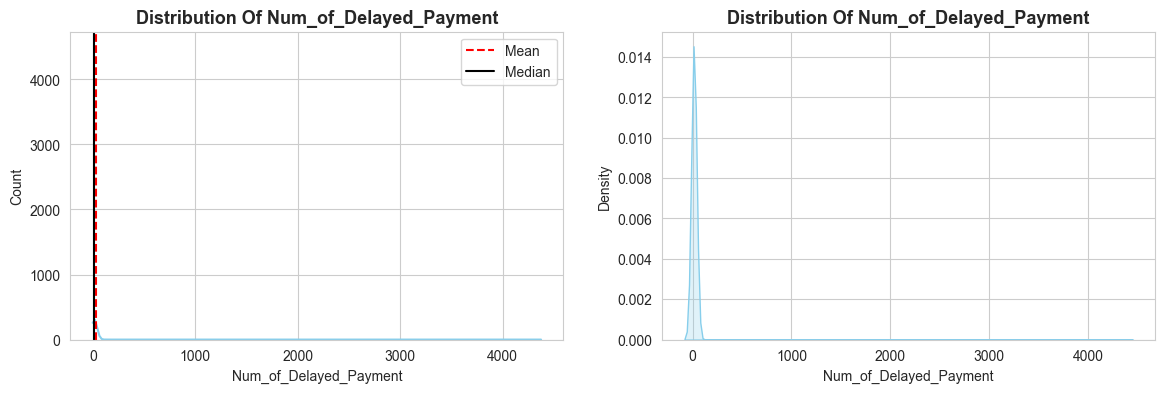

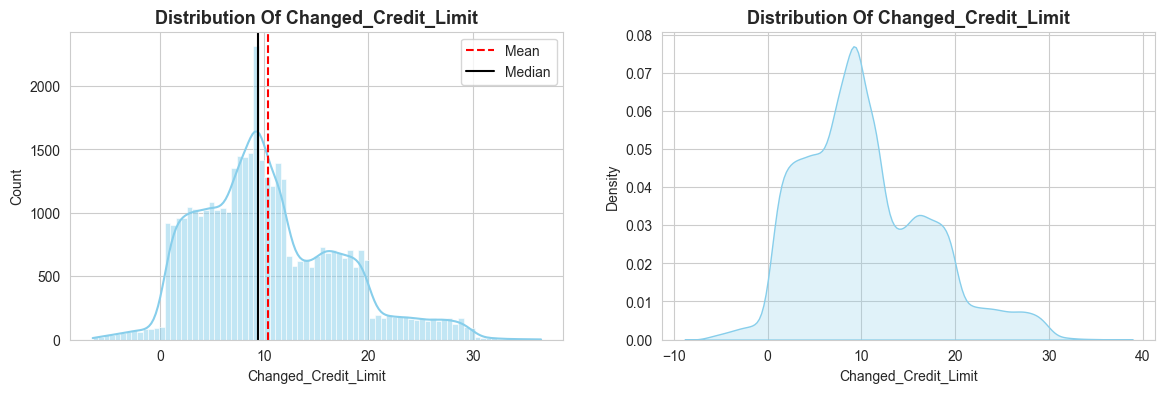

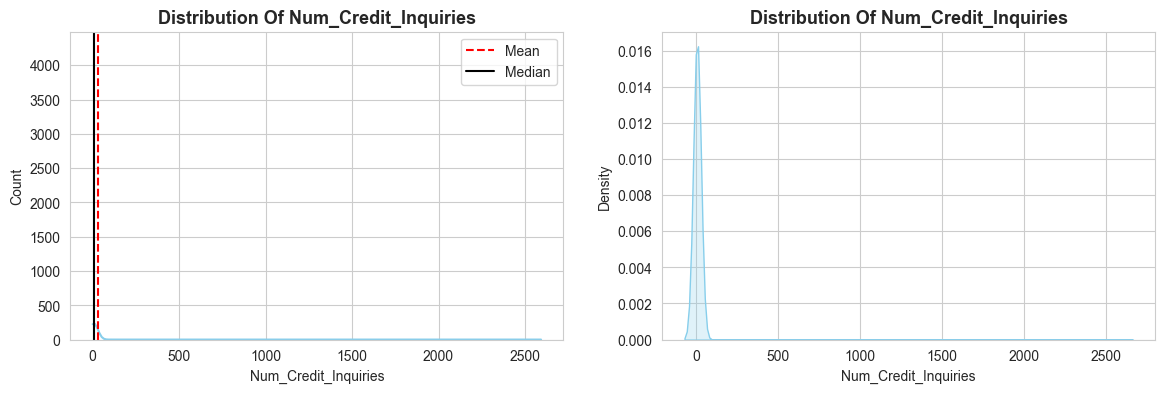

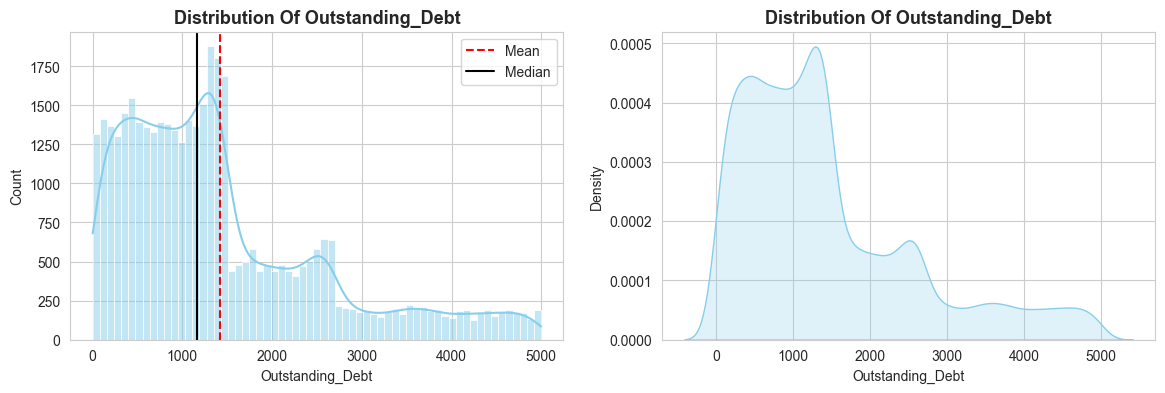

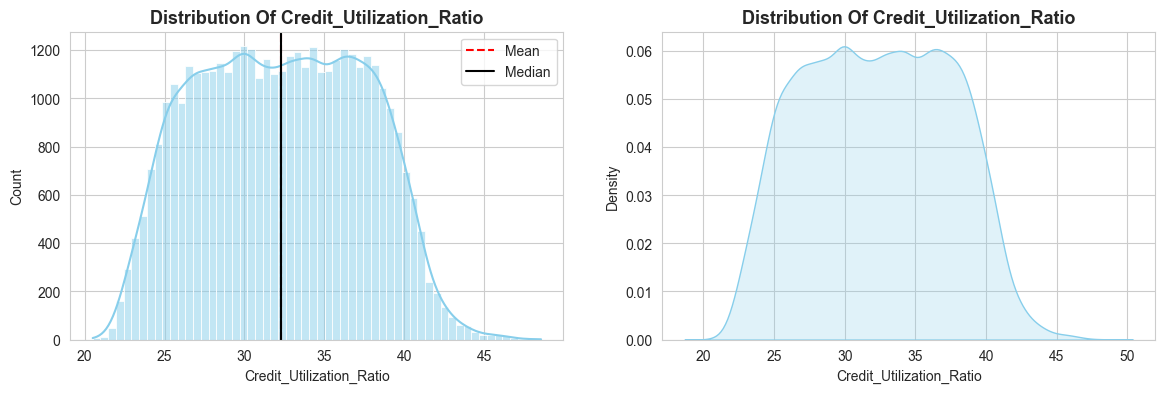

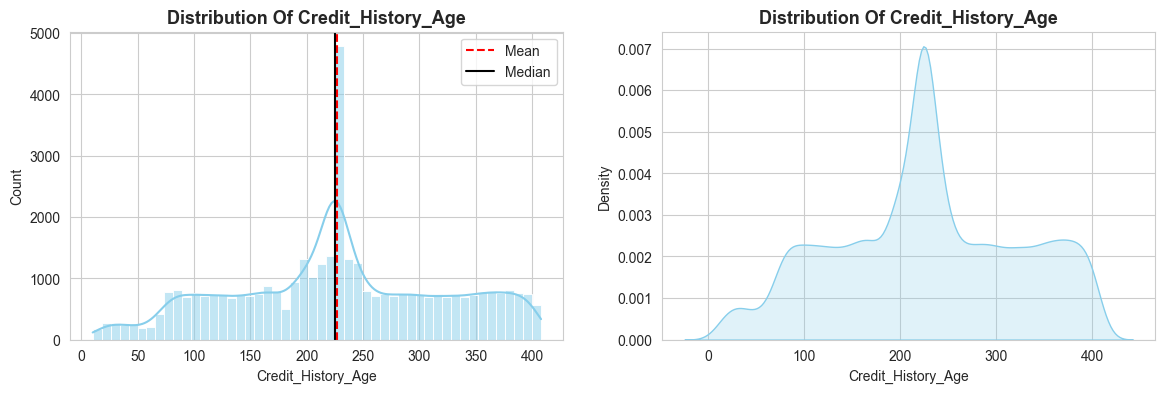

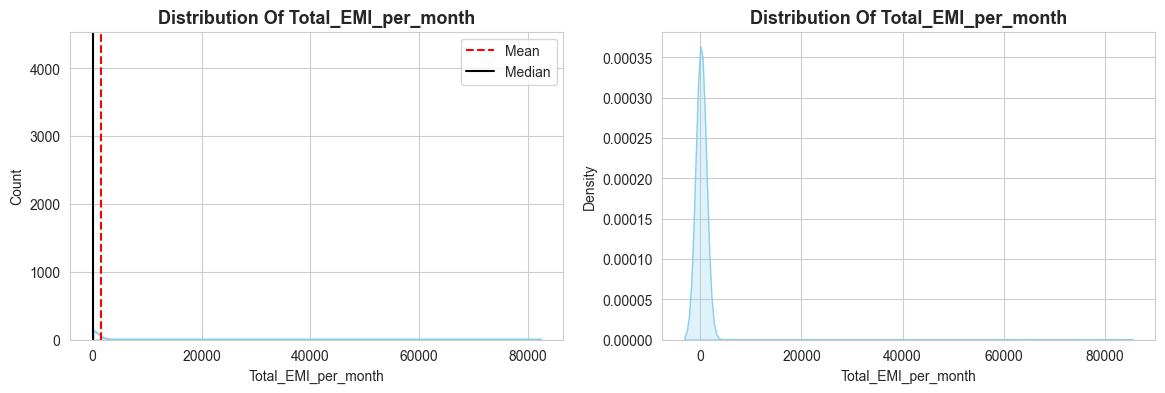

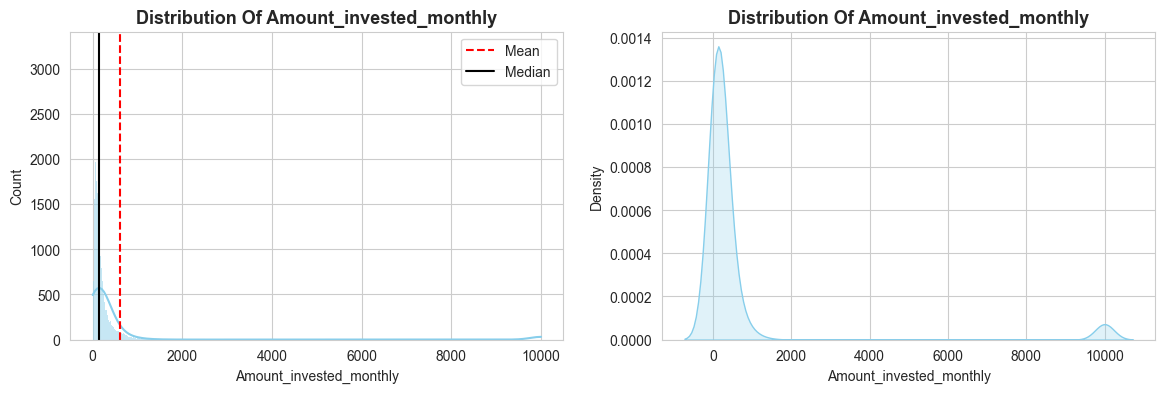

ValueError: Maximum allowed size exceeded

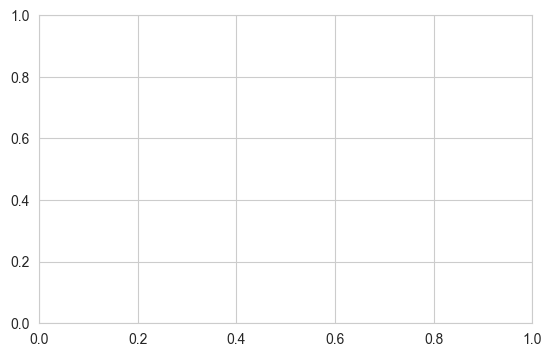

In [83]:
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.axvline(df_cleaned[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_cleaned[col].median(), color='black', label='Median')
    plt.legend()
    plt.title(f'Distribution Of {col}', fontsize=13, fontweight='bold')
    
    plt.subplot(122)
    sns.kdeplot(df_cleaned[col], color='skyblue', fill=True)
    plt.title(f'Distribution Of {col}', fontsize=13, fontweight='bold')

    plt.show()

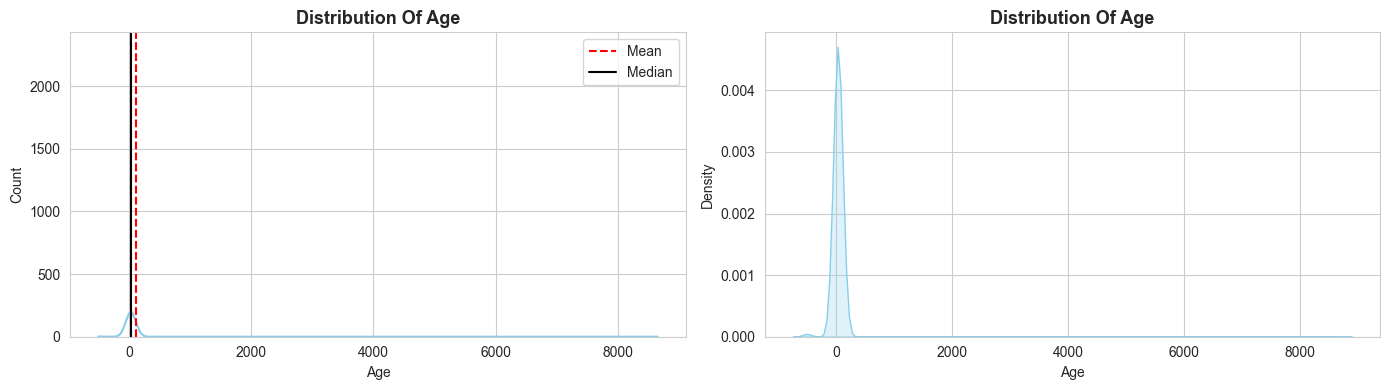

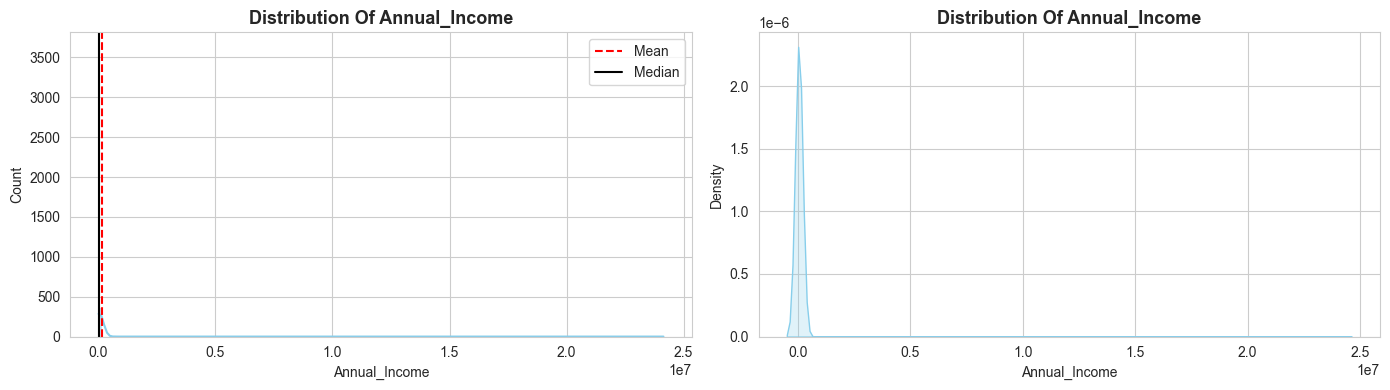

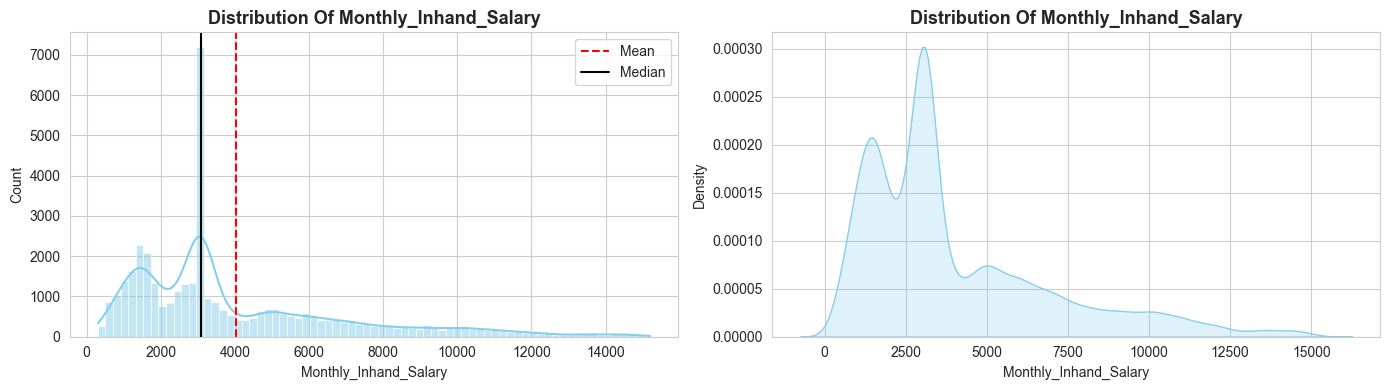

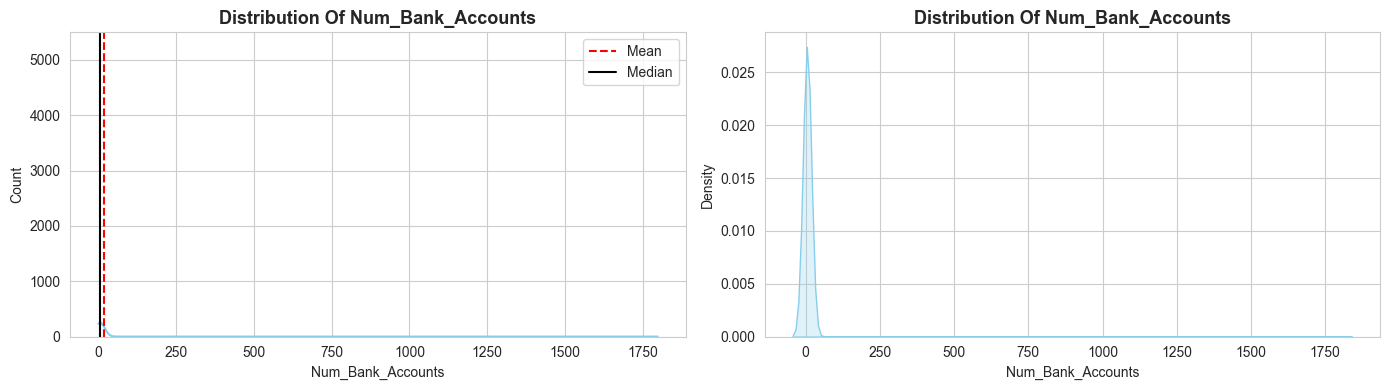

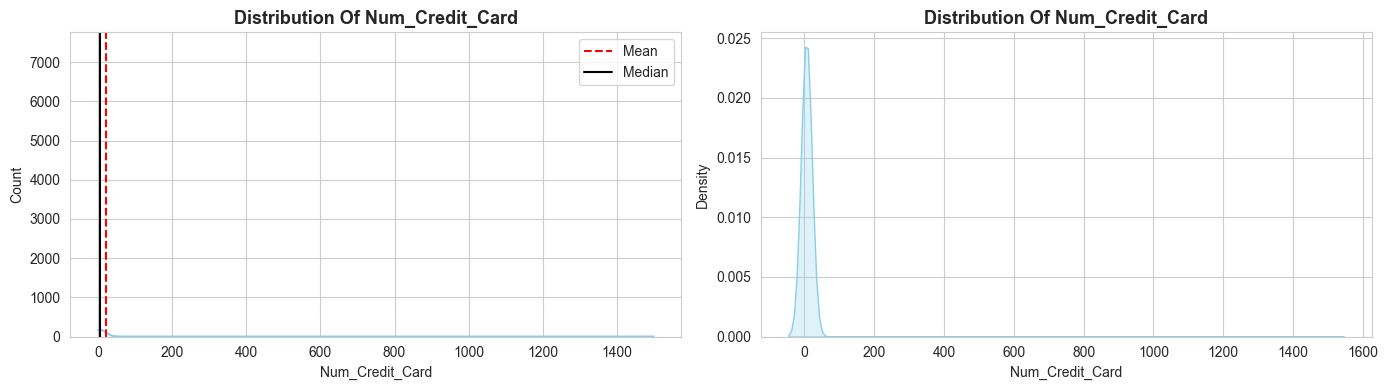

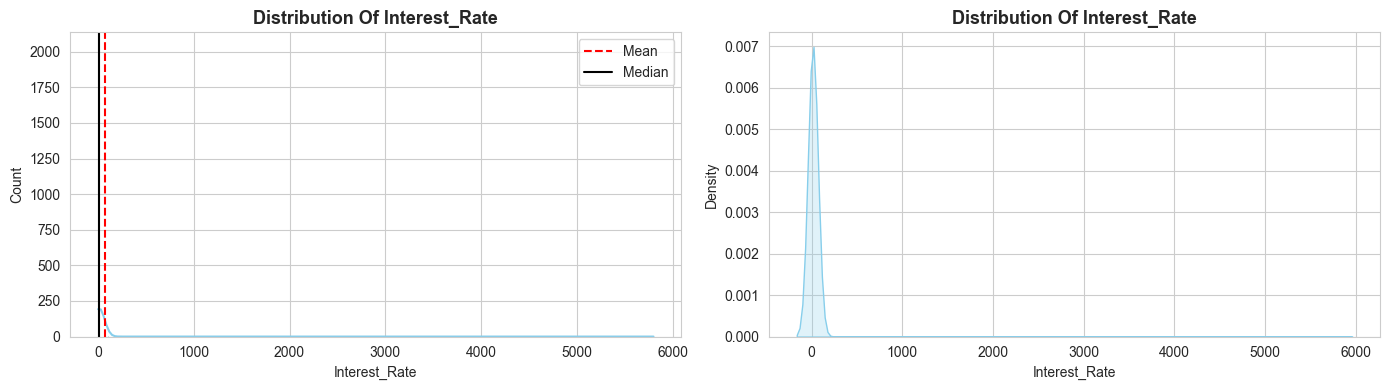

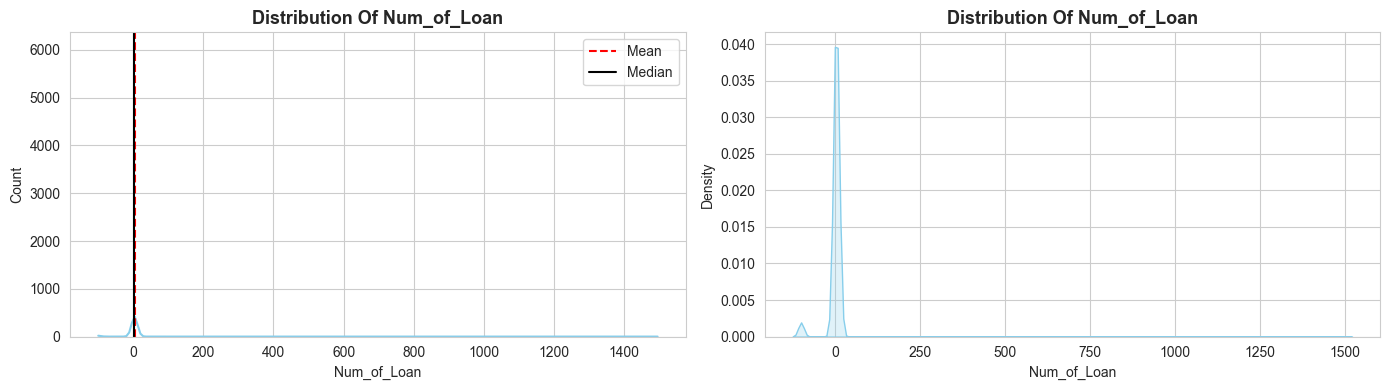

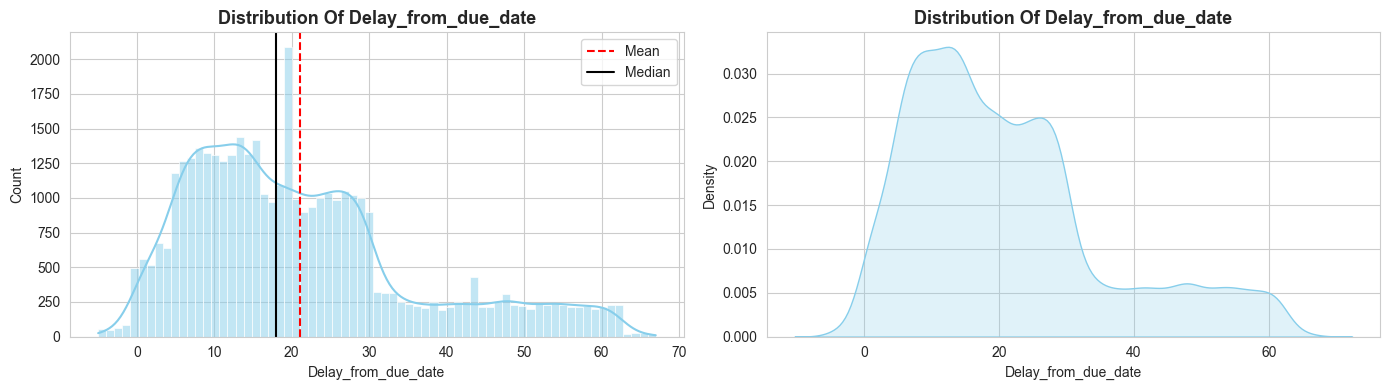

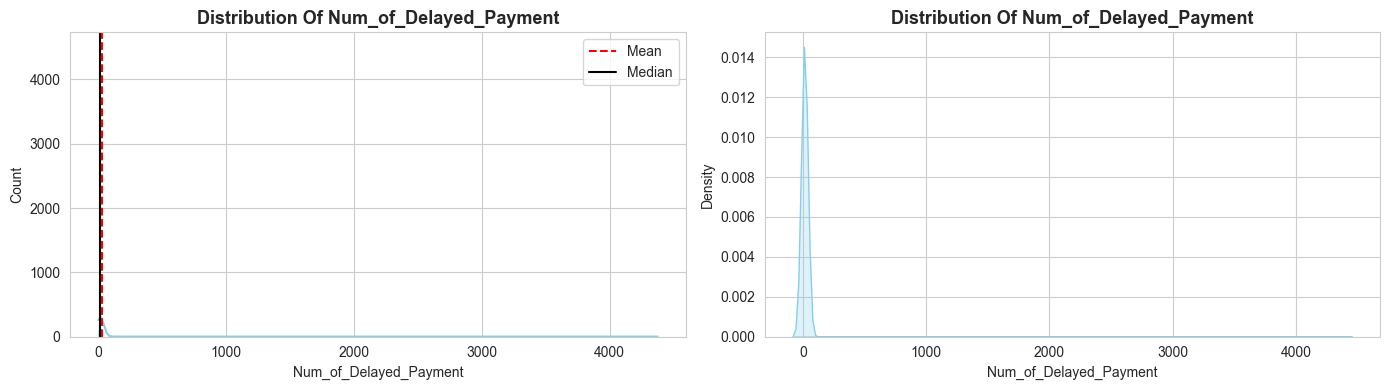

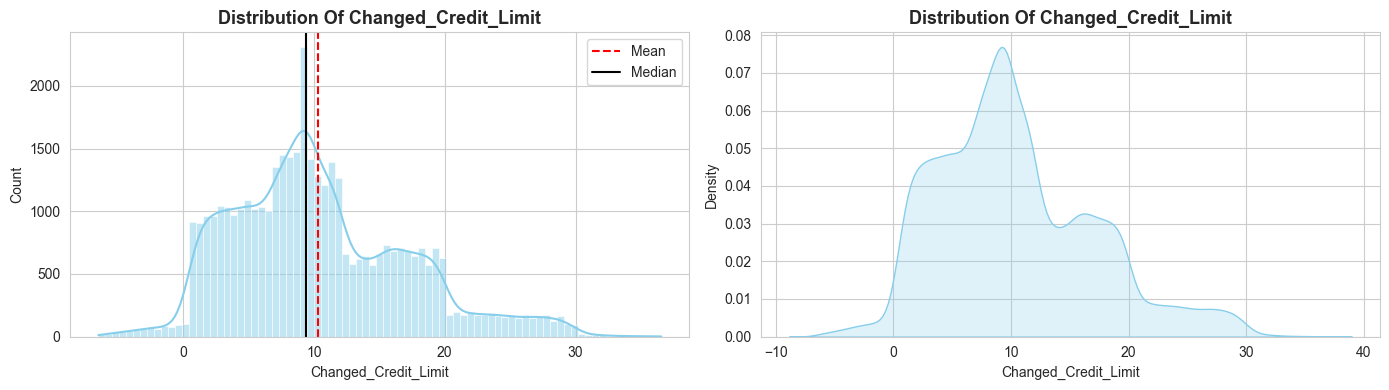

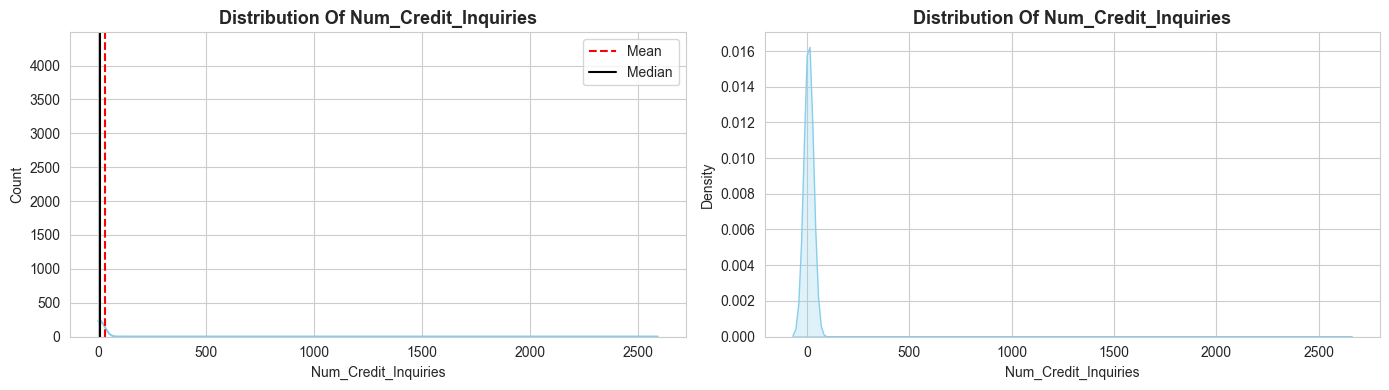

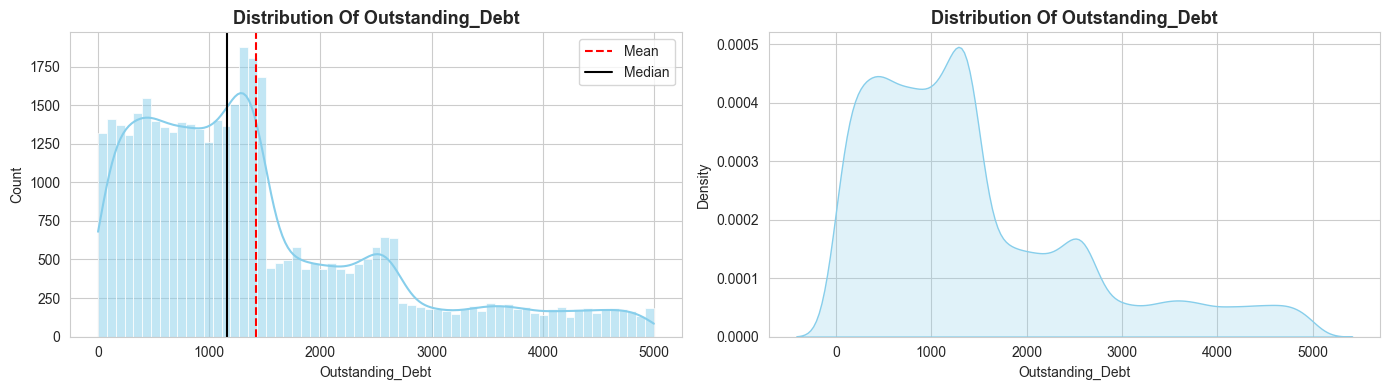

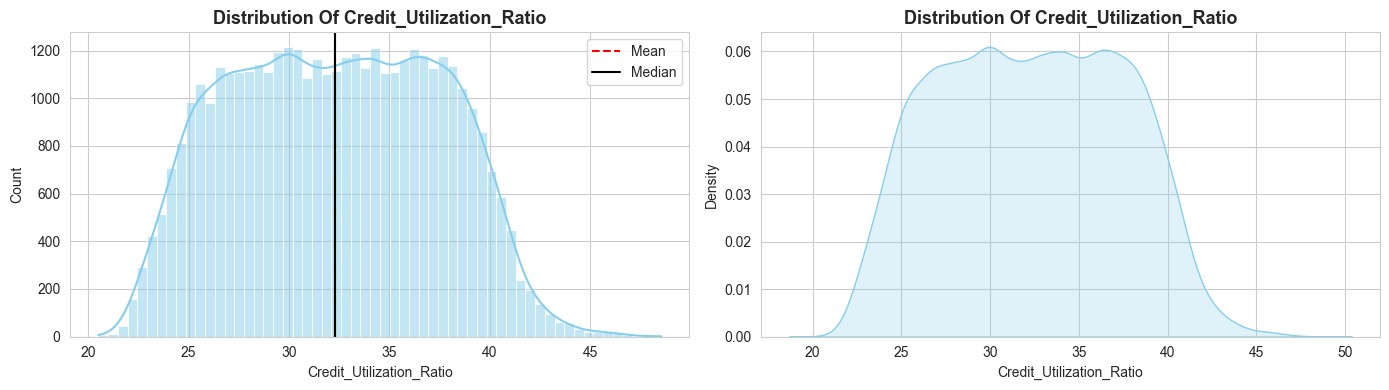

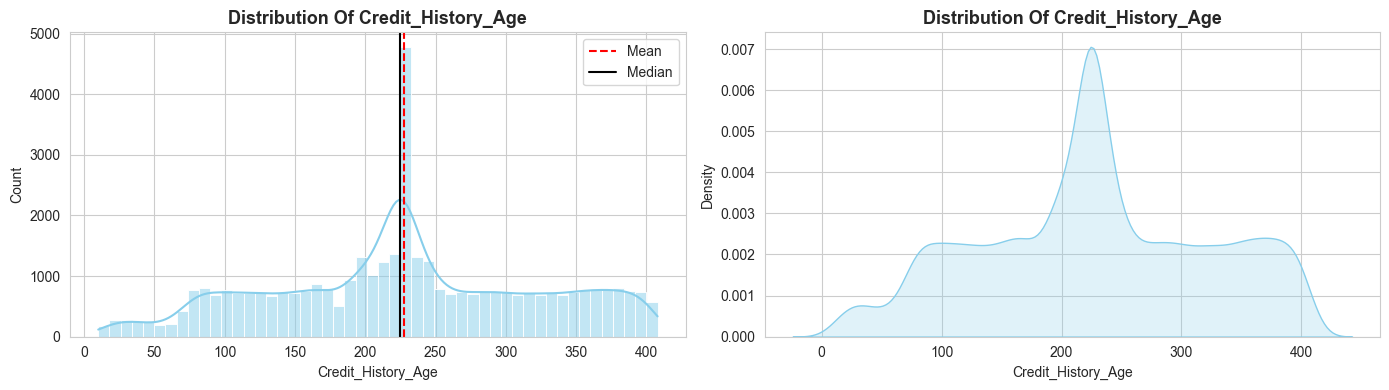

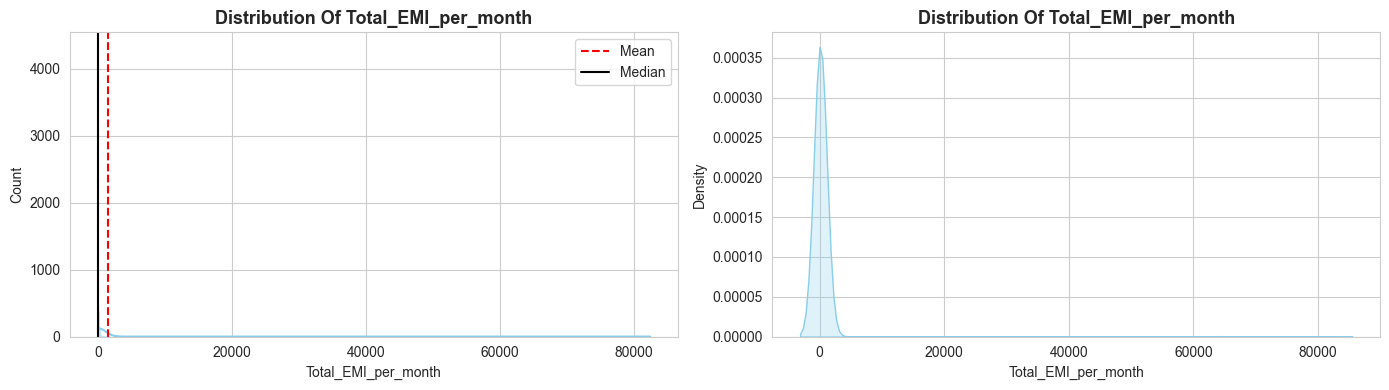

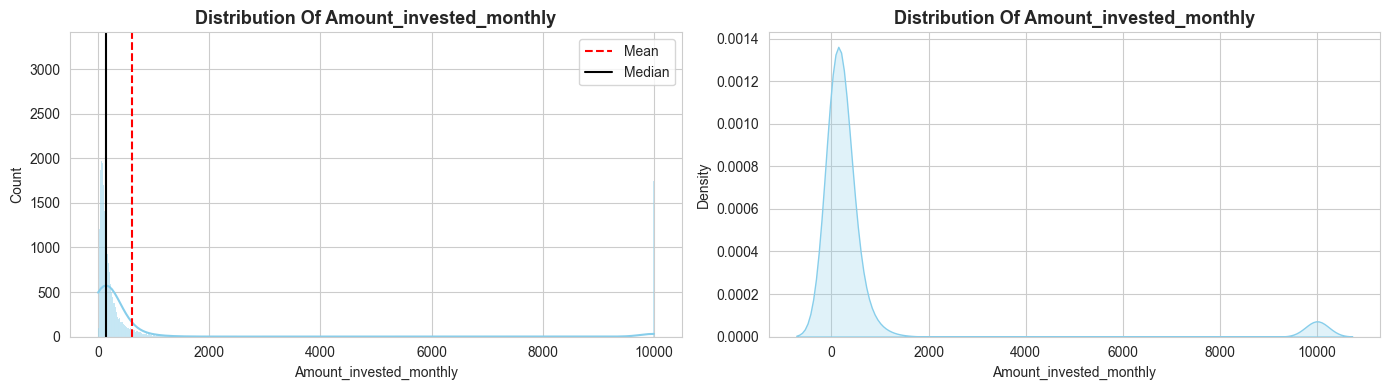

ValueError: Maximum allowed size exceeded

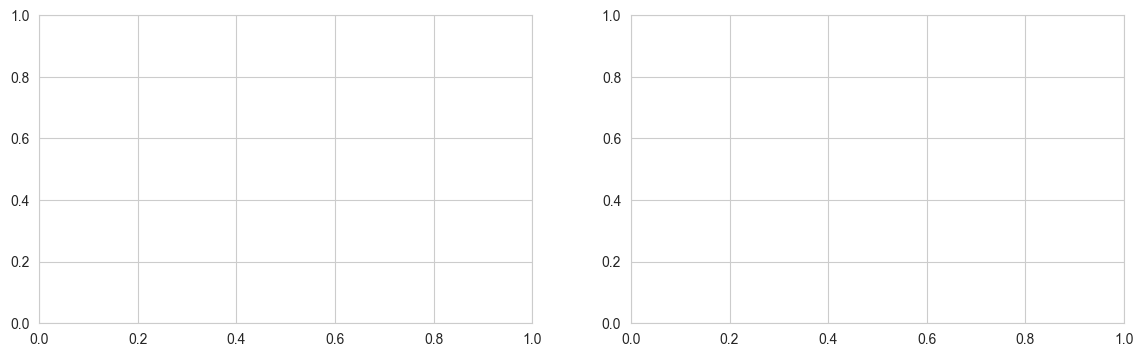

In [84]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    sns.histplot(df_cleaned[col], kde=True, ax=ax[0], color='skyblue')
    ax[0].axvline(df_cleaned[col].mean(), color='red', linestyle='--', label='Mean')
    ax[0].axvline(df_cleaned[col].median(), color='black', label='Median')
    ax[0].legend()
    ax[0].set_title(f'Distribution Of {col}', fontsize=13, fontweight='bold')

    sns.kdeplot(df_cleaned[col], ax=ax[1], color='skyblue', fill=True)
    ax[1].set_title(f'Distribution Of {col}', fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.show()
    plt.close(fig)


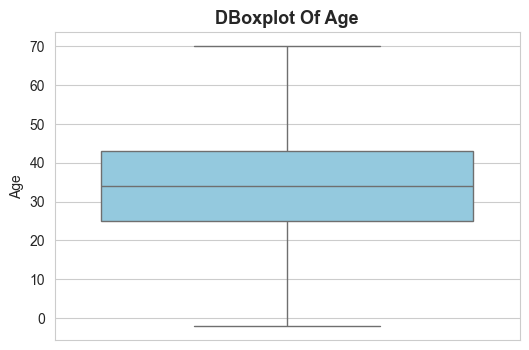

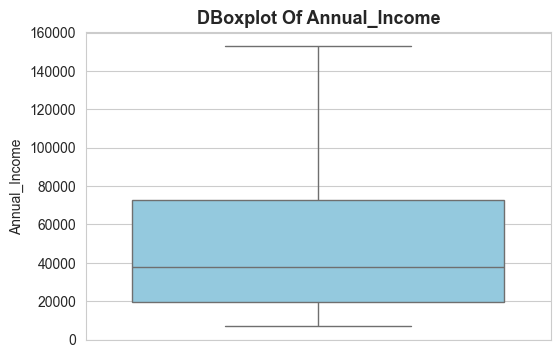

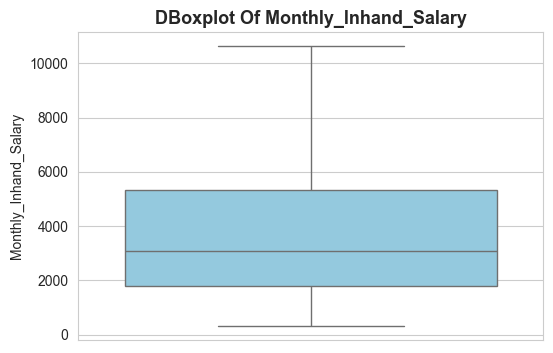

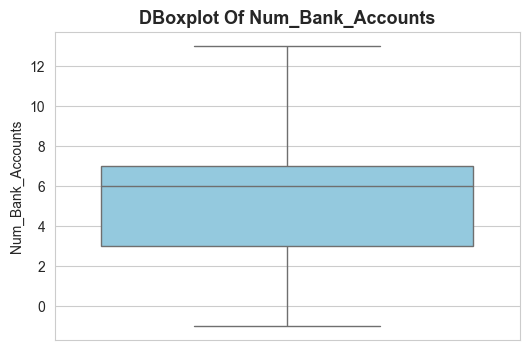

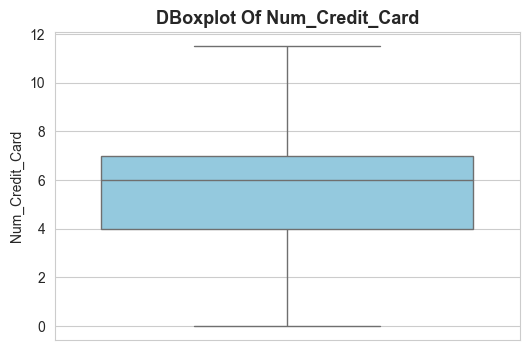

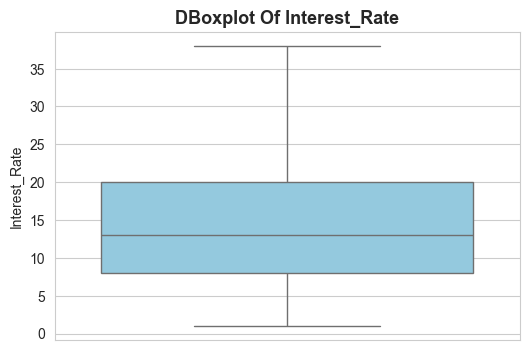

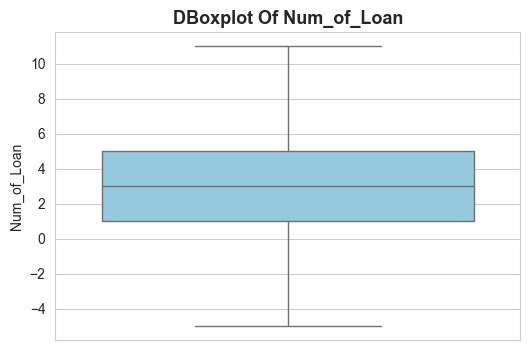

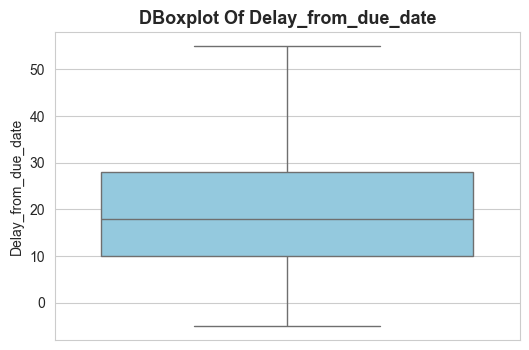

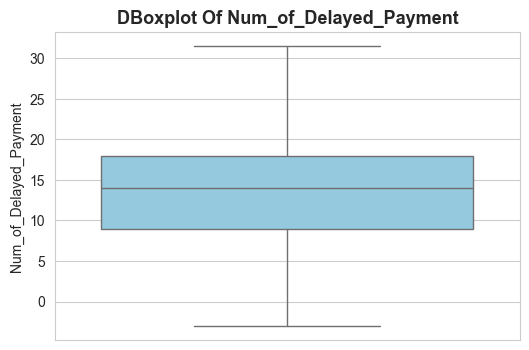

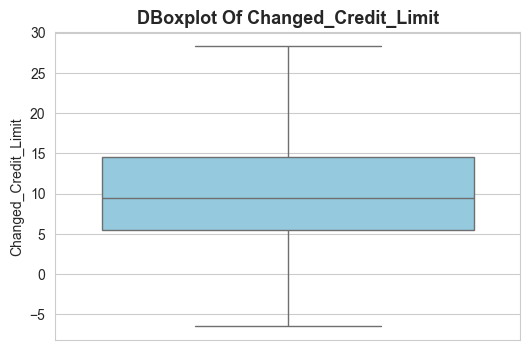

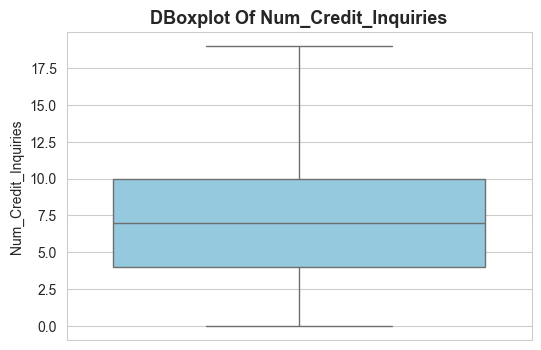

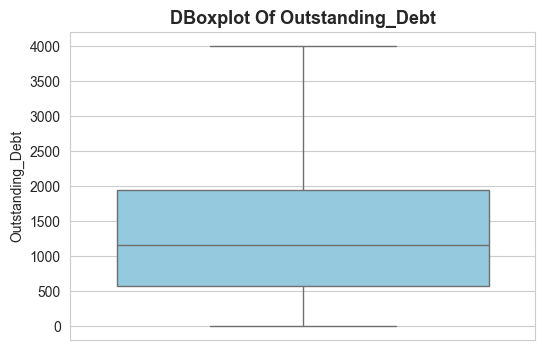

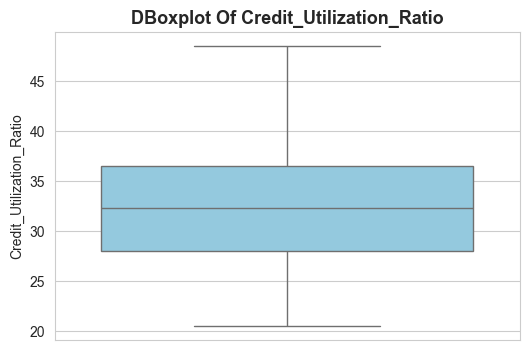

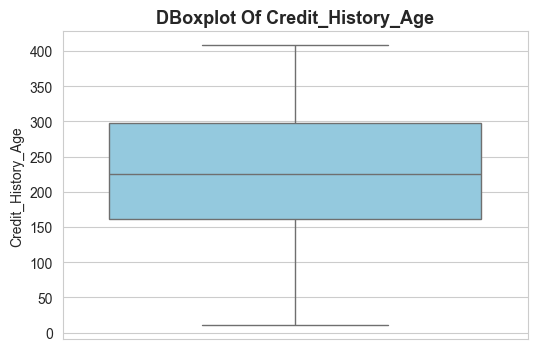

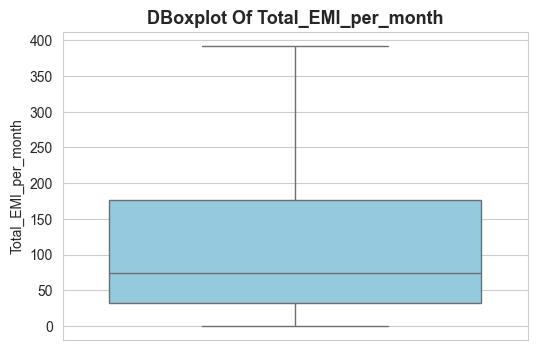

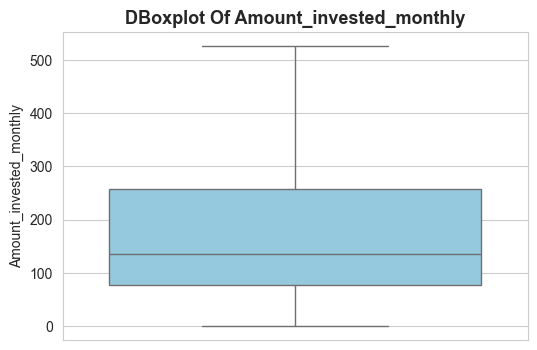

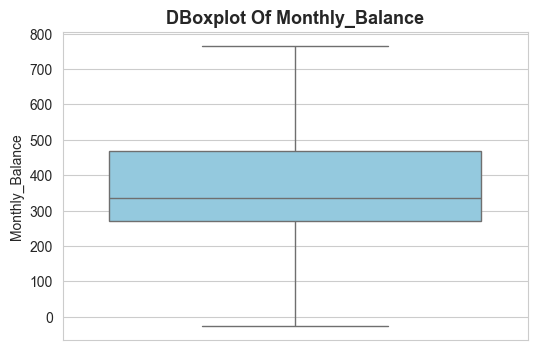

In [90]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_cleaned[col], color='skyblue', fill=True)
    plt.title(f'DBoxplot Of {col}', fontsize=13, fontweight='bold')
    plt.show()

**Note:** There is too many outliers. Handle the outliers using IQR.

In [85]:
# Calculate IQR

percentile75 = df_cleaned[num_cols].quantile(0.75)
percentile25 = df_cleaned[num_cols].quantile(0.25)

iqr = percentile75 - percentile25
iqr

Age                            18.000000
Annual_Income               53369.200000
Monthly_Inhand_Salary        3528.706516
Num_Bank_Accounts               4.000000
Num_Credit_Card                 3.000000
Interest_Rate                  12.000000
Num_of_Loan                     4.000000
Delay_from_due_date            18.000000
Num_of_Delayed_Payment          9.000000
Changed_Credit_Limit            9.160000
Num_Credit_Inquiries            6.000000
Outstanding_Debt             1373.670000
Credit_Utilization_Ratio        8.419858
Credit_History_Age            137.000000
Total_EMI_per_month           143.927598
Amount_invested_monthly       179.448916
Monthly_Balance               197.728023
dtype: float64

In [86]:
# Upper Boundry Lower Boundry

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [87]:
# Limit values using clip

df_cleaned[num_cols] = df_cleaned[num_cols].clip(lower=lower_limit, upper=upper_limit, axis=1)


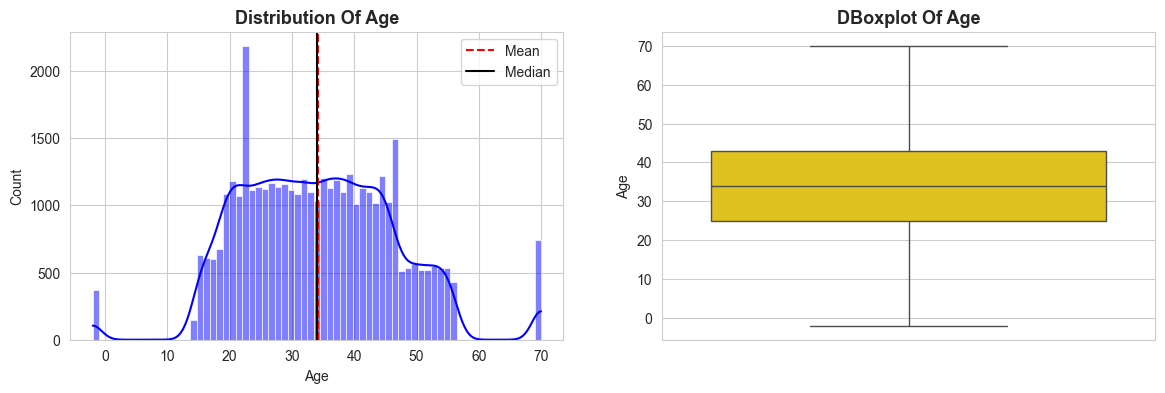

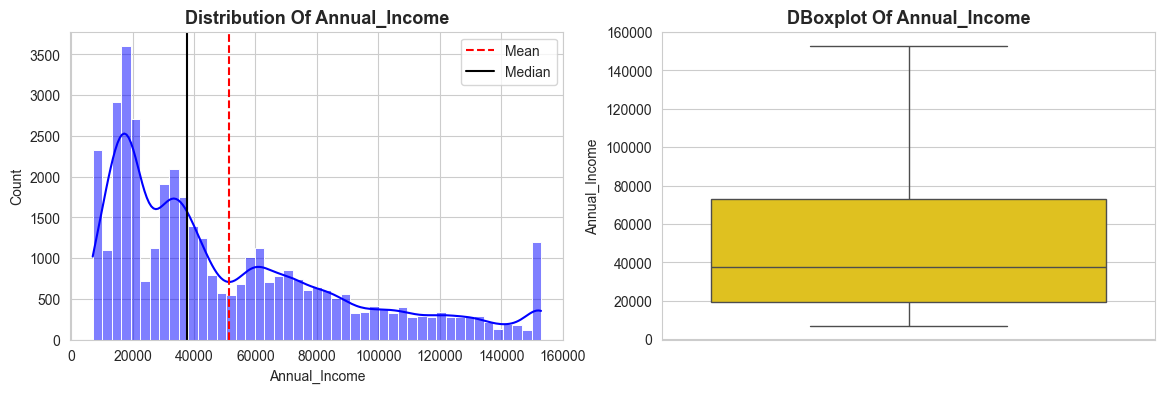

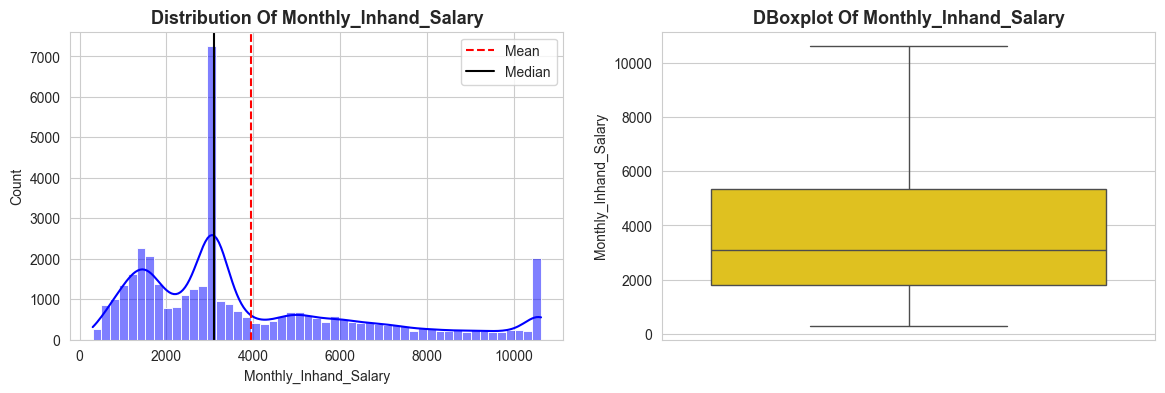

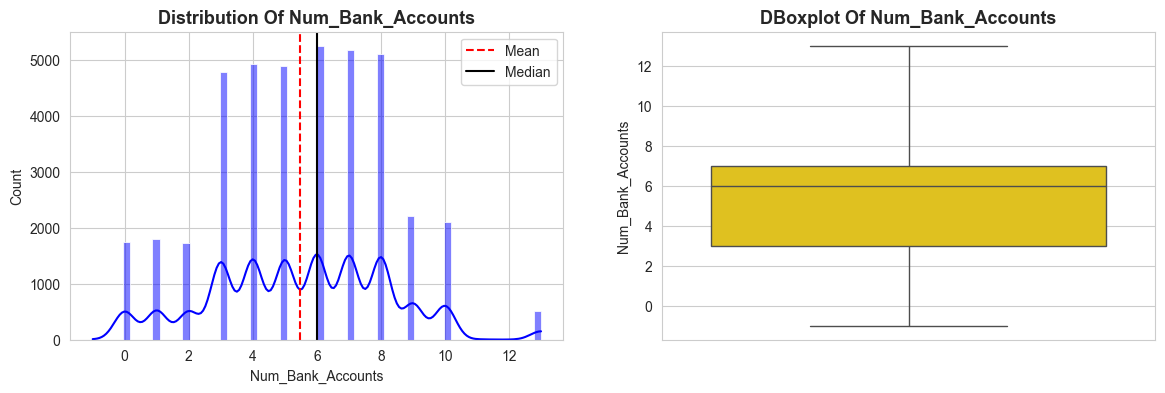

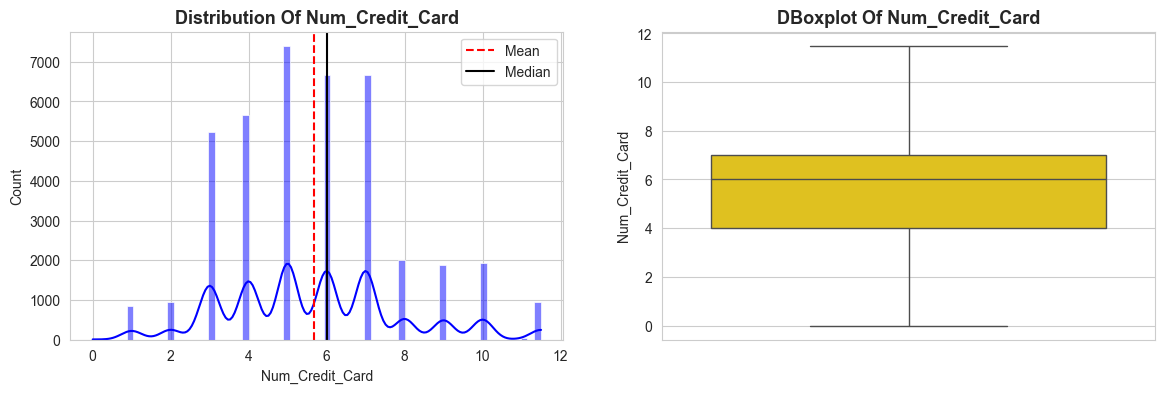

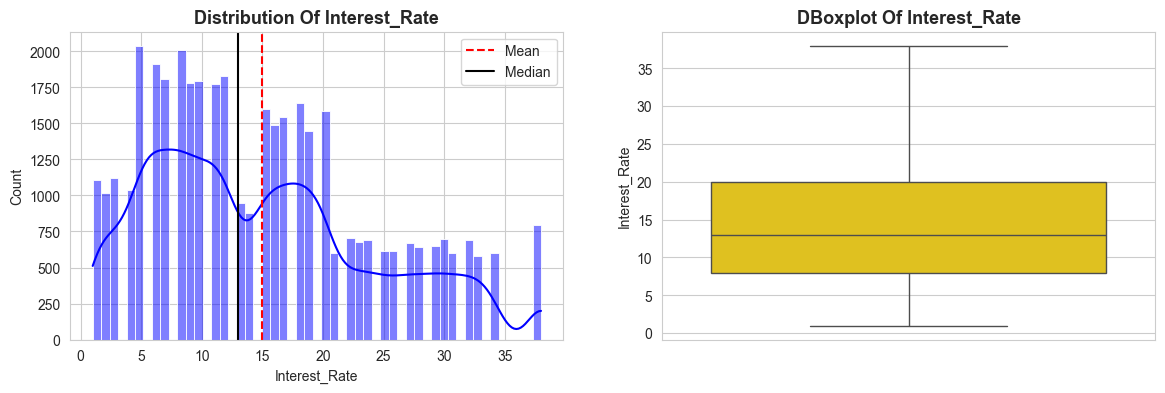

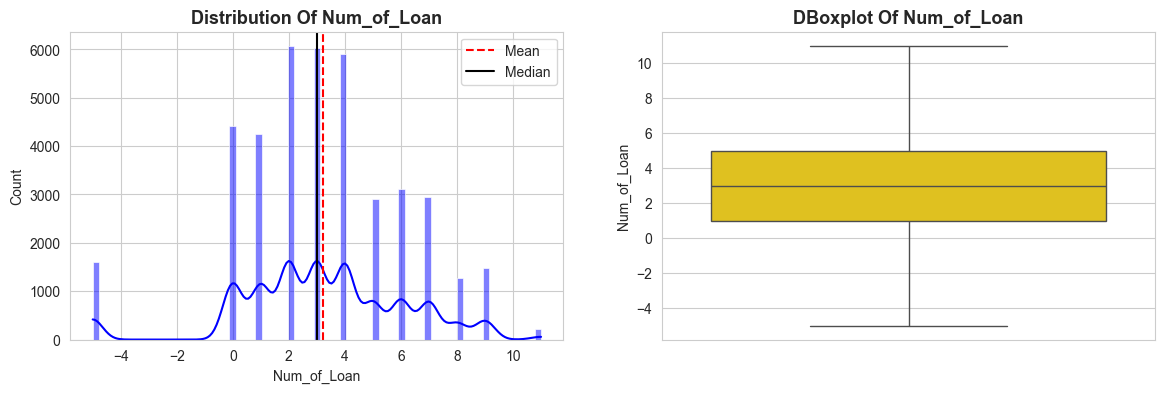

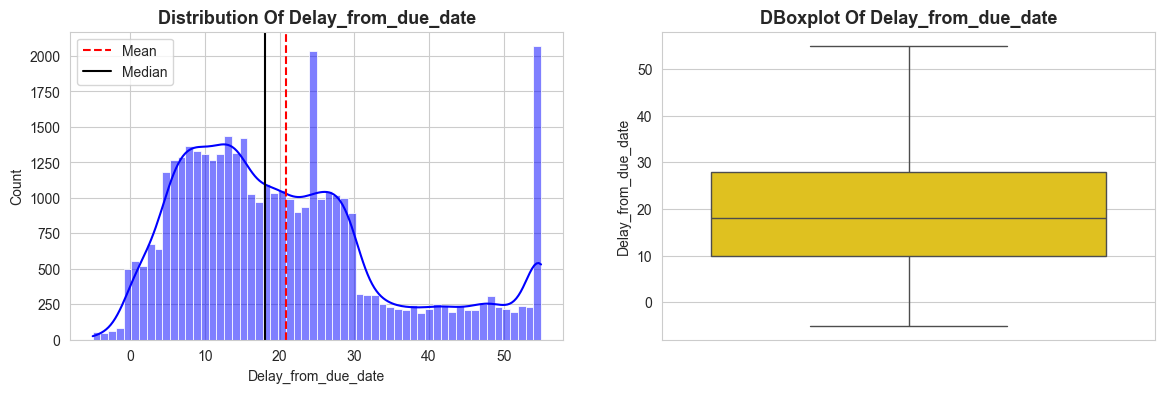

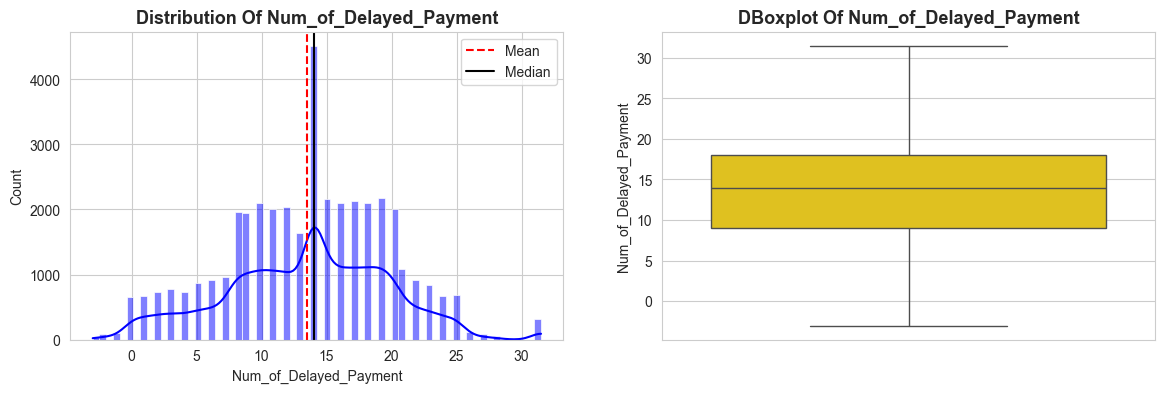

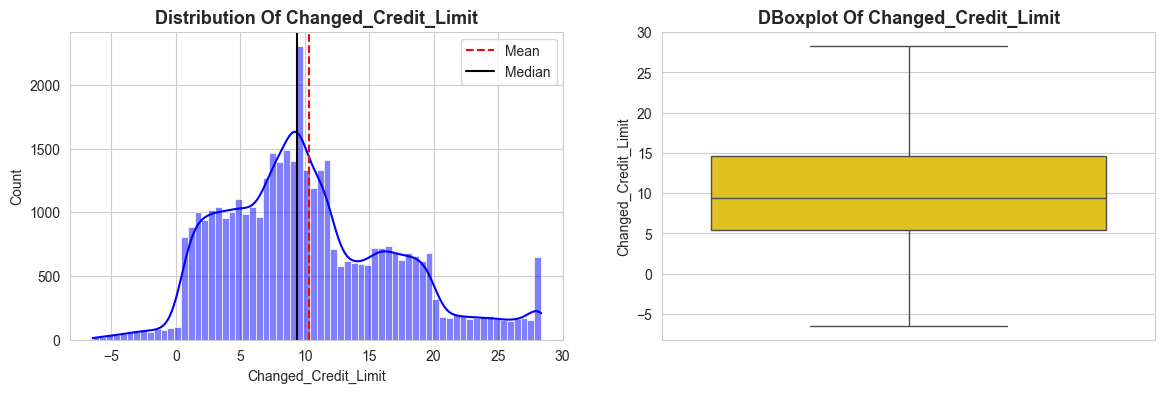

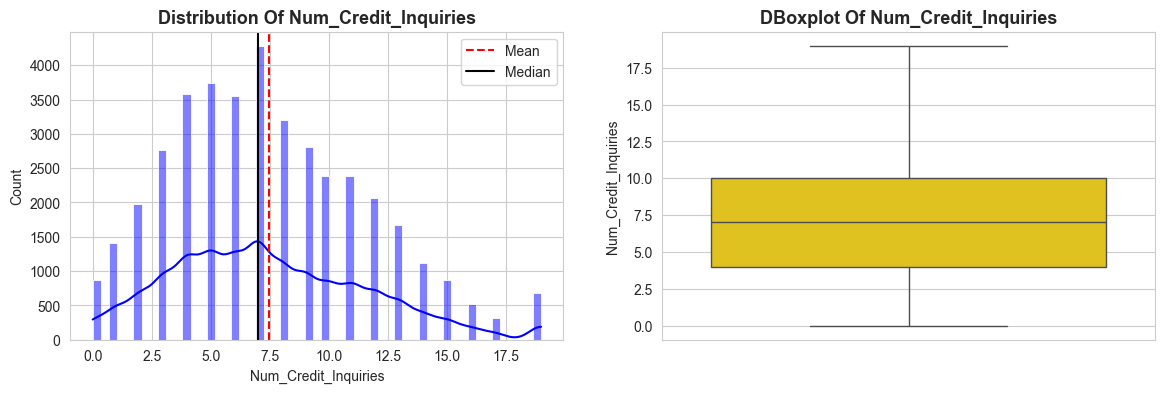

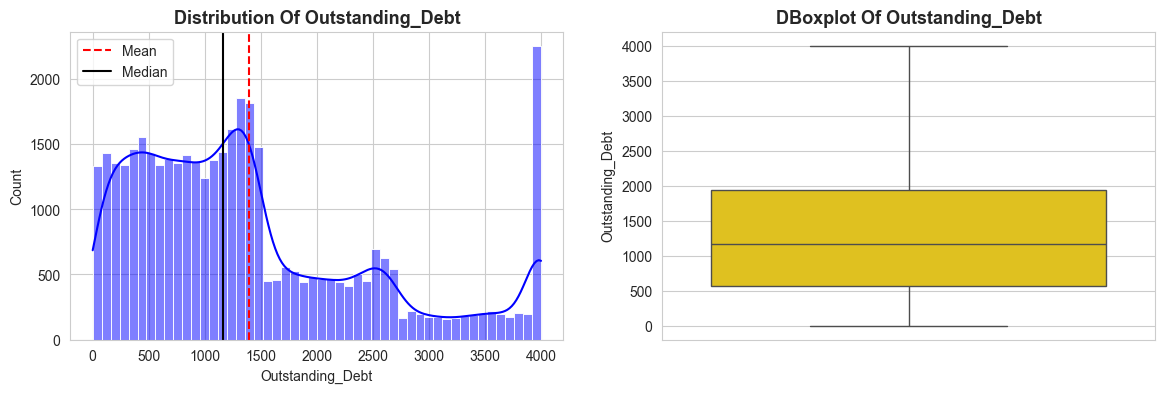

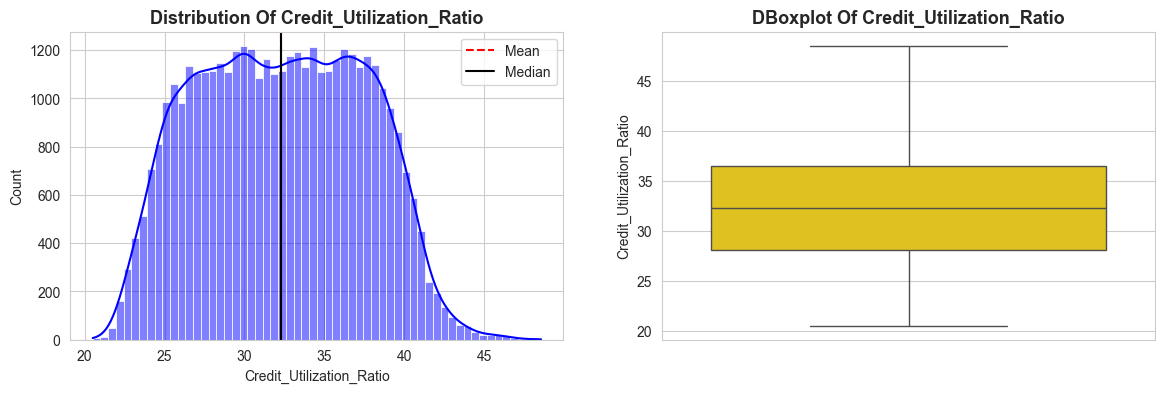

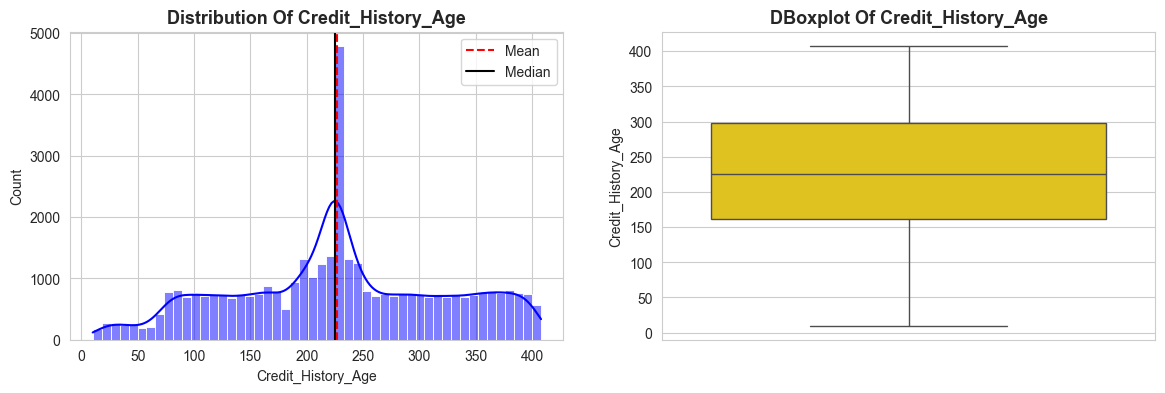

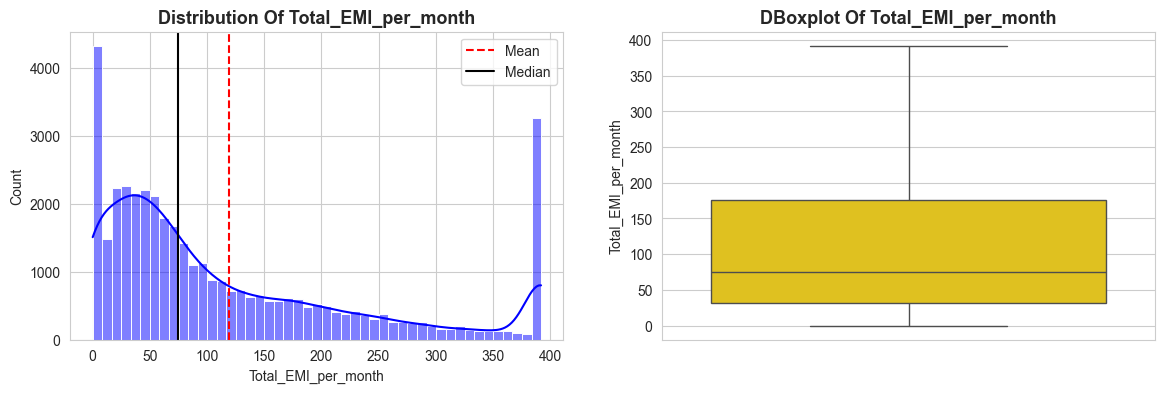

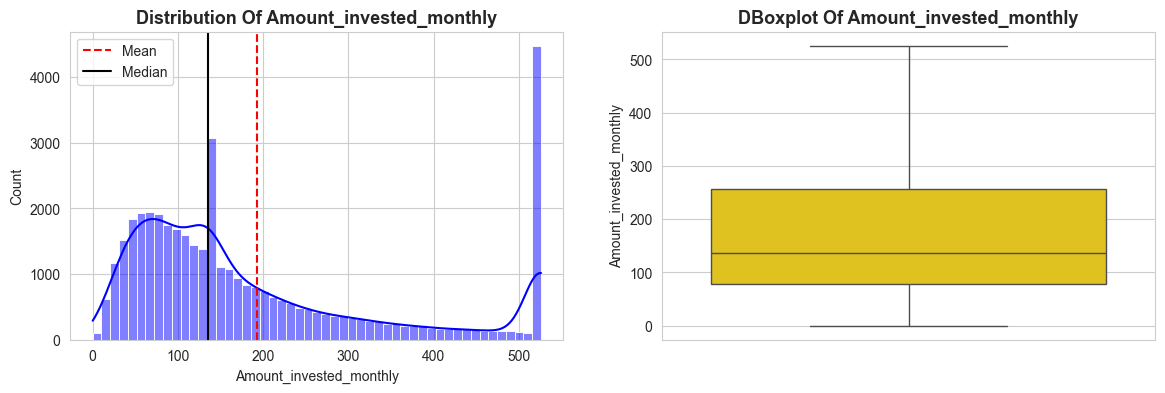

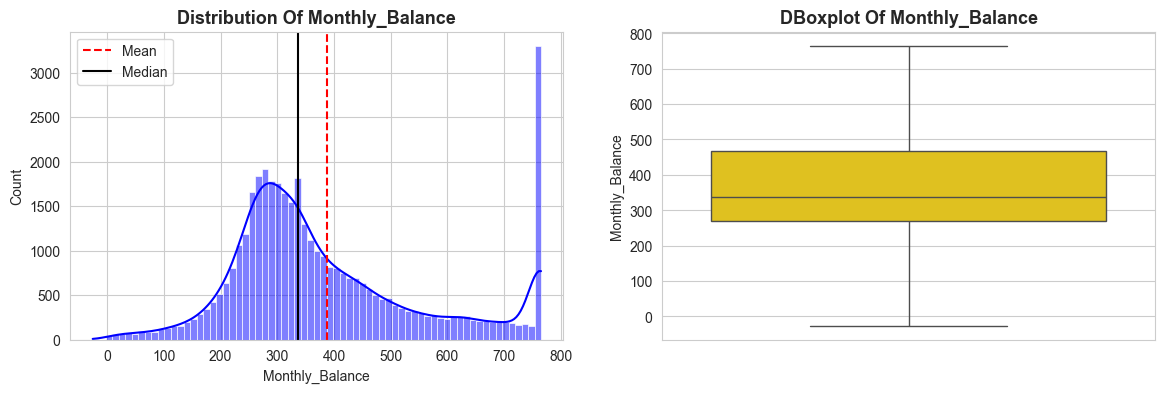

In [ ]:
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(df_cleaned[col], kde=True, color='blue')
    plt.axvline(df_cleaned[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df_cleaned[col].median(), color='black', label='Median')
    plt.legend()
    plt.title(f'Distribution Of {col}', fontsize=13, fontweight='bold')
    
    plt.subplot(122)
    sns.boxplot(df_cleaned[col], color='gold', fill=True)
    plt.title(f'Boxplot Of {col}', fontsize=13, fontweight='bold')
    plt.show()

    plt.show()

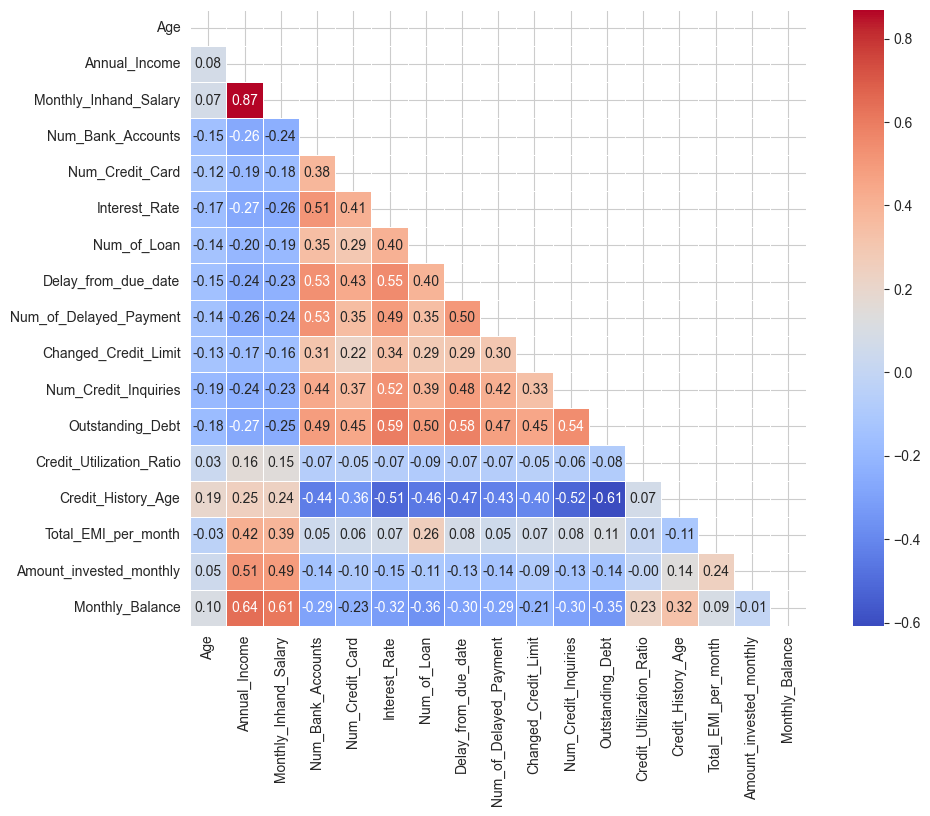

In [96]:
# Correlation heatmap

corr = df_cleaned.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidth=0.5)
plt.show()

**Note:** Annual_Income and Monthly_Inhand_Salary are highly correlated. One of them can be dropped.

In [99]:
# Drop Monthly_Inhand_Salary

df_cleaned.drop(['Monthly_Inhand_Salary'], axis=1, inplace=True)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40195 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       40195 non-null  int64  
 1   Occupation                40195 non-null  object 
 2   Annual_Income             40195 non-null  float64
 3   Num_Bank_Accounts         40195 non-null  int64  
 4   Num_Credit_Card           40195 non-null  float64
 5   Interest_Rate             40195 non-null  int64  
 6   Num_of_Loan               40195 non-null  int64  
 7   Type_of_Loan              40195 non-null  object 
 8   Delay_from_due_date       40195 non-null  int64  
 9   Num_of_Delayed_Payment    40195 non-null  float64
 10  Changed_Credit_Limit      40195 non-null  float64
 11  Num_Credit_Inquiries      40195 non-null  float64
 12  Credit_Mix                40195 non-null  object 
 13  Outstanding_Debt          40195 non-null  float64
 14  Credit_Util

## 3. Model Building
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.


## 4. Model Evaluation
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.


## 5. Hyperparameter Tuning
- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.


## 6. Retrain Models
- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

## 7. Final Performance and Cross-Validation
- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.


## 8. Suggestions
- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.
